## **SUPERVISED LEARNING - PROJECT - Ms.Dipali Jain (JUNE 2021)**

# **PART 1 (PROJECT BASED)**

**• DOMAIN:** Healthcare

**• CONTEXT:** 

Medical research university X is undergoing a deep research on patients with certain conditions. University has an internal AI team. Due to confidentiality the patient’s details and the conditions are masked by the client by providing different datasets to the AI team for developing a AIML model which can predict the condition of the patient depending on the received test results.

**• DATA DESCRIPTION:** 

The data consists of biomechanics features of the patients according to their current conditions. Each patient is represented in the data set by six biomechanics attributes derived from the shape and orientation of the condition to their body part.

1. P_incidence
2. P_tilt
3. L_angle
4. S_slope
5. P_radius
6. S_degree
7. Class

**• PROJECT OBJECTIVE**: 

Demonstrate the ability to fetch, process and leverage data to generate useful predictions by training Supervised Learning algorithms.

# **1. Import and warehouse data:**

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Import Libraries**

In [1]:
# Import all the necessary libraries.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 

import warnings
warnings.filterwarnings('ignore')

**• Import all the given datasets and explore shape and size of each.**

In [ ]:
#Import Dataset
df1 = pd.read_csv('/content/drive/MyDrive/AIML-GL/SL PROJECT/Part1 - Normal.csv')
df2 = pd.read_csv('/content/drive/MyDrive/AIML-GL/SL PROJECT/Part1 - Type_H.csv')
df3 = pd.read_csv('/content/drive/MyDrive/AIML-GL/SL PROJECT/Part1 - Type_S.csv')

In [ ]:
# Explore shape and size of first dataset
df1.shape

(100, 7)

**Check dimension and datatypes of all the columns of three datasets**

In [ ]:
# Checking attributes of first dataset
df1.info()
df1.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  100 non-null    float64
 1   P_tilt       100 non-null    float64
 2   L_angle      100 non-null    float64
 3   S_slope      100 non-null    float64
 4   P_radius     100 non-null    float64
 5   S_Degree     100 non-null    float64
 6   Class        100 non-null    object 
dtypes: float64(6), object(1)
memory usage: 5.6+ KB


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [ ]:
# Explore shape and size of second dataset
df2.shape

(60, 7)

In [ ]:
# Checking attributes of second dataset
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  60 non-null     float64
 1   P_tilt       60 non-null     float64
 2   L_angle      60 non-null     float64
 3   S_slope      60 non-null     float64
 4   P_radius     60 non-null     float64
 5   S_Degree     60 non-null     float64
 6   Class        60 non-null     object 
dtypes: float64(6), object(1)
memory usage: 3.4+ KB


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Type_H
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Type_H


In [ ]:
# Explore shape and size of third dataset
df3.shape

(150, 7)

In [ ]:
# Checking attributes of third dataset
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  150 non-null    float64
 1   P_tilt       150 non-null    float64
 2   L_angle      150 non-null    float64
 3   S_slope      150 non-null    float64
 4   P_radius     150 non-null    float64
 5   S_Degree     150 non-null    float64
 6   Class        150 non-null    object 
dtypes: float64(6), object(1)
memory usage: 8.3+ KB


,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S
3,77.690577,21.380645,64.429442,56.309932,114.818751,26.931841,Type_S
4,76.147212,21.936186,82.961502,54.211027,123.932010,10.431972,Type_S


**• Merge all datasets onto one and explore final shape and size.**

In [ ]:
# Merging all the 3 datasets over rows
Biomechanics = pd.concat([df1,df2,df3],axis=0,ignore_index=True,sort=False) 

In [ ]:
# Check the dimensions of final dataset
print(f" Shape of the dataframe = {Biomechanics.shape}")

 Shape of the dataframe = (310, 7)


# **2. Data cleansing:**

• Explore and if required correct the datatypes of each attribute.

• Explore for null values in the attributes and if required drop or impute values.

In [ ]:
# Explore data type of each columns of final dataset. 
Biomechanics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   P_incidence  310 non-null    float64
 1   P_tilt       310 non-null    float64
 2   L_angle      310 non-null    float64
 3   S_slope      310 non-null    float64
 4   P_radius     310 non-null    float64
 5   S_Degree     310 non-null    float64
 6   Class        310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


There are 310 rows and 7 columns in the final dataset.

In [ ]:
# Check attributes of the independent variables AND Checking basic details of the data
Biomechanics.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
5,30.741938,13.354966,35.903526,17.386972,142.410107,-2.005373,Normal
95,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
214,80.988074,36.843172,86.960602,44.144903,141.088149,85.872152,Type_S
86,39.656902,16.208839,36.674857,23.448063,131.922009,-4.968980,Normal
58,57.145851,16.489091,42.842148,40.656760,113.806177,5.015186,Normal


**Describe function generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values.** 

This method tells us a lot of things about a dataset. One important thing is that the describe() method deals only with numeric values. It doesn't work with any categorical values. So if there are any categorical values in a column the describe() method will ignore it and display summary for the other columns

In [ ]:
# Let's check the five point summary of each feature in the dataset.
Biomechanics.describe().transpose() 

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


It is observed that in P_tilt 75 % of values are less than 22 but maximum value is 49 so there might be little right skewness and S_Degree Mean is greater than Median so there might be right skewness in the data .

We can see 75% of values are less than 41 but maximum value is 418 so there are significant outliers.

In [ ]:
# Check distribution of target variable, 'Class' 
Biomechanics['Class'].value_counts()

Type_S    133
Normal     73
Type_H     37
Nrmal      27
type_h     23
tp_s       17
Name: Class, dtype: int64

There are some rows in which the target variable "Class" is not properly specified. Use .replace function to correct the data in 'Class' column.

In [ ]:
# Correcting the values in target variable using replace function.
Biomechanics.Class.replace(['Nrmal','type_h','tp_s'],['Normal','Type_H','Type_S'],inplace=True)

In [ ]:
Biomechanics['Class'].value_counts() # There are 3 classes in the target variable.

Type_S    150
Normal    100
Type_H     60
Name: Class, dtype: int64

**Checking for null values in the dataset.**

In [ ]:
Biomechanics.isnull().sum()

P_incidence    0
P_tilt         0
L_angle        0
S_slope        0
P_radius       0
S_Degree       0
Class          0
dtype: int64

**There are no missing values in the dataset**

**Change all the classes in the target variable to numericals (0 to 2) using label encoding.**

In [ ]:
# Check uniques values i.e. classes in target variable.
Biomechanics.iloc[:,6].unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [ ]:
# Use label encoder to convert categorical variables to one-hot encoding 

from sklearn.preprocessing import LabelEncoder
class_label_encoder = LabelEncoder()

Biomechanics.iloc[:,-1] = class_label_encoder.fit_transform(Biomechanics.iloc[:,-1])

In [ ]:
Biomechanics.sample(5) # Check the encoded labels of target variable, 'Class'

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
46,54.752520,9.752520,48.000000,45.000000,123.037999,8.235294,0
289,82.406524,29.276422,77.054565,53.130102,117.042244,62.765348,2
204,77.409333,29.396545,63.232302,48.012788,118.450731,93.563737,2
227,80.433428,16.998479,66.536018,63.434949,116.438981,57.781250,2
20,65.611802,23.137919,62.582179,42.473883,124.128001,-4.083298,0


# **3. Data analysis & visualisation:**

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each
analysis.

# **Univariate analysis**

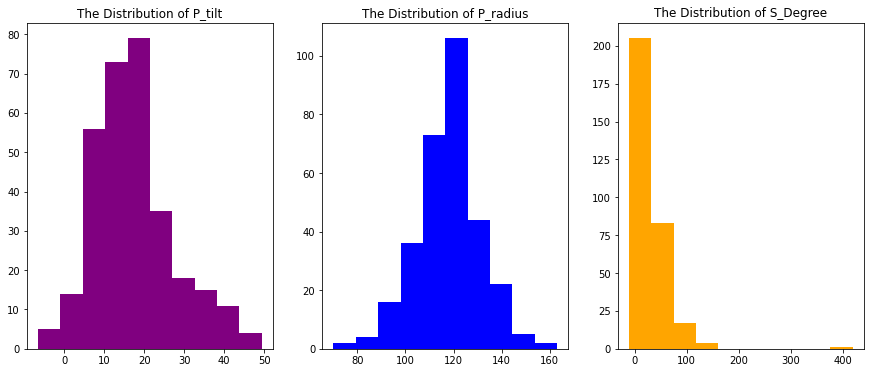

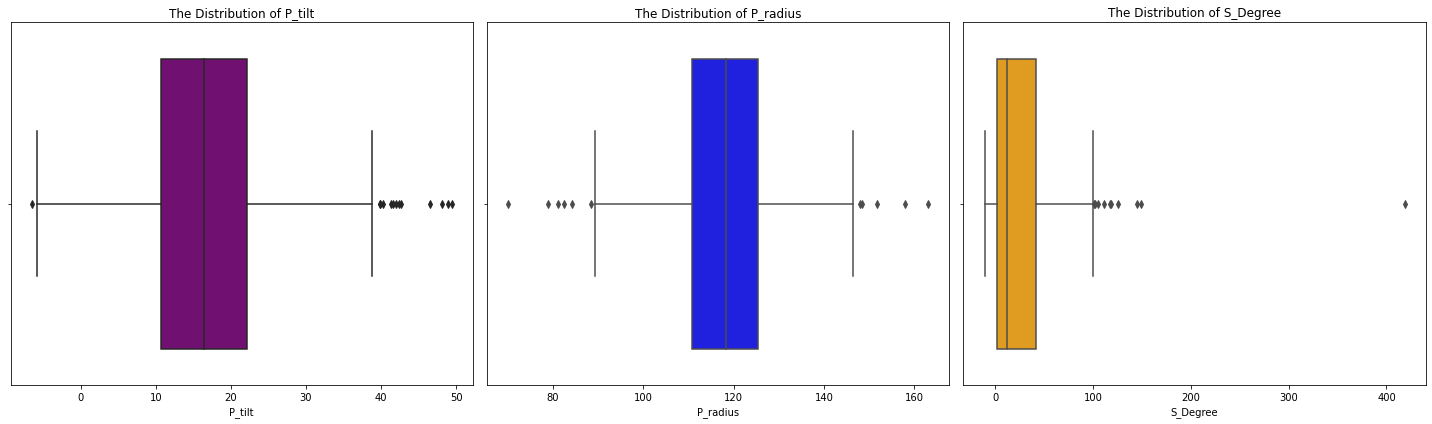

In [ ]:
fig = plt.figure(figsize = (15,6))

ra1 = fig.add_subplot(1,3,1) 
ra2 = fig.add_subplot(1,3,2)
ra3 = fig.add_subplot(1,3,3)

ra1.hist(Biomechanics['P_tilt'],color = 'purple')
ra1.set_title('The Distribution of P_tilt')

ra2.hist(Biomechanics['P_radius'],color = 'blue')
ra2.set_title('The Distribution of P_radius')

ra3.hist(Biomechanics['S_Degree'],color = 'orange')
ra3.set_title('The Distribution of S_Degree')


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('The Distribution of P_tilt')
sns.boxplot(Biomechanics['P_tilt'],color='purple')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('The Distribution of P_radius')
sns.boxplot(Biomechanics['P_radius'],orient='vertical',color= 'blue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('The Distribution of S_Degree')
sns.boxplot(Biomechanics['S_Degree'],color='orange')

plt.tight_layout() 
plt.show()


**'P-tilt:'** 

It has normal distribution but a little skewness towards right side.

We can see one outlier in negative end and few outliers in positive side.

**'P_radius:'**

Data is normally distributed. We can see some outliers at both the sides.

**'S_Degree:'**

There are significant outliers and the data is Positively Skewed. 

# **Bivariate Analysis**

**Perform bivariate viualization with Insights.**

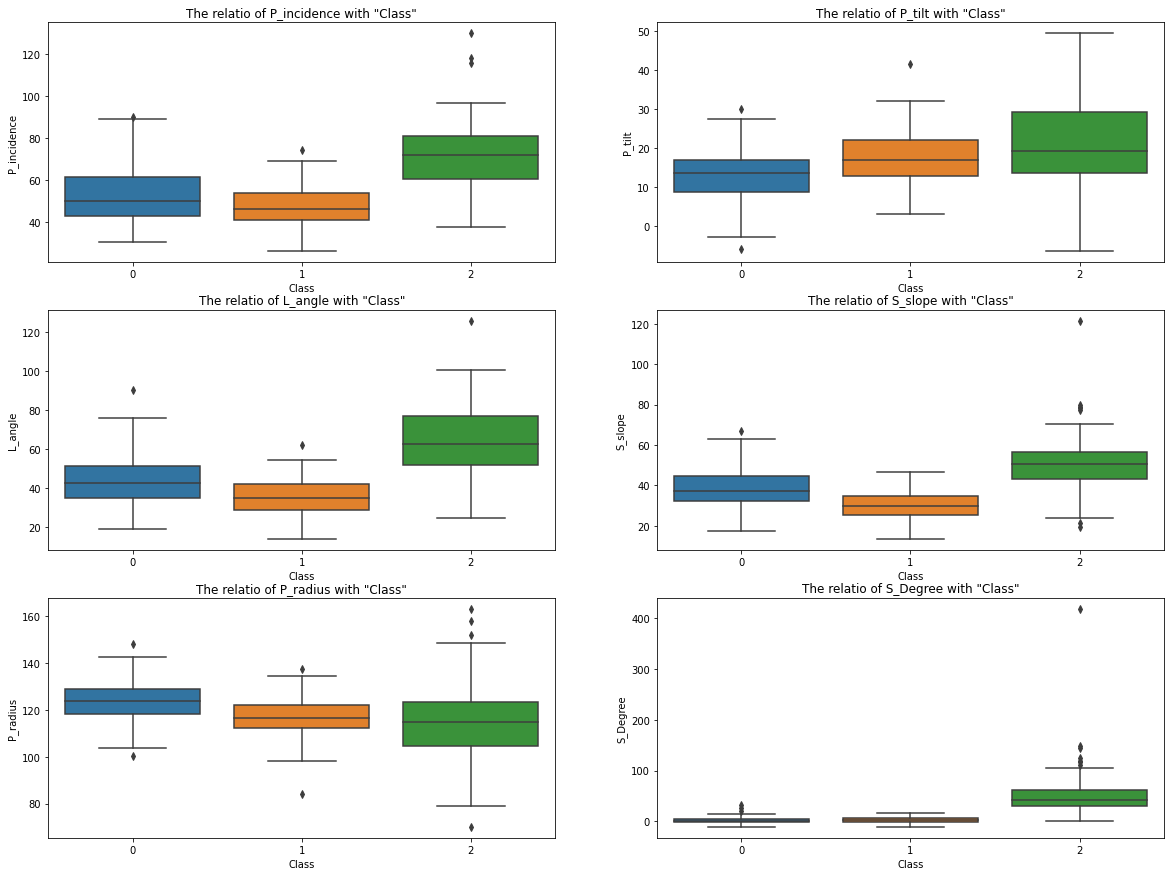

In [ ]:
# Observe the relation between all the independent variables and target variable
plt.figure(figsize=(20,15))

plt.subplot(3, 2, 1)
plt.title('The relatio of P_incidence with "Class"')
sns.boxplot(x='Class', y='P_incidence', data= Biomechanics)

plt.subplot(3, 2, 2)
plt.title('The relatio of P_tilt with "Class"')
sns.boxplot(x='Class', y='P_tilt', data= Biomechanics)

plt.subplot(3, 2, 3)
plt.title('The relatio of L_angle with "Class"')
sns.boxplot(x='Class', y='L_angle', data= Biomechanics)

plt.subplot(3, 2, 4)
plt.title('The relatio of S_slope with "Class"')
sns.boxplot(x='Class', y='S_slope', data= Biomechanics)

plt.subplot(3, 2, 5)
plt.title('The relatio of P_radius with "Class"')
sns.boxplot(x='Class', y='P_radius', data= Biomechanics)

plt.subplot(3, 2, 6)
plt.title('The relatio of S_Degree with "Class"')
sns.boxplot(x='Class', y='S_Degree', data= Biomechanics)

plt.show()

**P_Incidence**  Normal Value is slightly higher than Type_H, and for Type_S Class Value is larger.

**P_til**
Type_H is slightly higher than Normal Value, and for Type_S Class Value is larger.

**L_Angle** 
 It has higher value for Type_S Class and Normal class has higher values compared to type_H class. Each class contains one outlier

**S_slope** has huge values for Type_S class


**P_radius**  Normal Class has more values. There are some extreme values for Type_s class


**S_Degree** has large values for Type_S Class


# **Multivariate Analysis**

**Perform Correlation analysis with Insights.**

In [ ]:
#Observe the association of each independent variable with target variable 
# and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

corr = Biomechanics.corr()
corr

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
P_incidence,1.000000,0.629199,0.717282,0.814960,-0.247467,0.638743,0.537638
P_tilt,0.629199,1.000000,0.432764,0.062345,0.032668,0.397862,0.348231
L_angle,0.717282,0.432764,1.000000,0.598387,-0.080344,0.533667,0.525466
S_slope,0.814960,0.062345,0.598387,1.000000,-0.342128,0.523557,0.430734
P_radius,-0.247467,0.032668,-0.080344,-0.342128,1.000000,-0.026065,-0.304099
S_Degree,0.638743,0.397862,0.533667,0.523557,-0.026065,1.000000,0.608705
Class,0.537638,0.348231,0.525466,0.430734,-0.304099,0.608705,1.000000


**Pearson's Correlation Coefficient:** helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

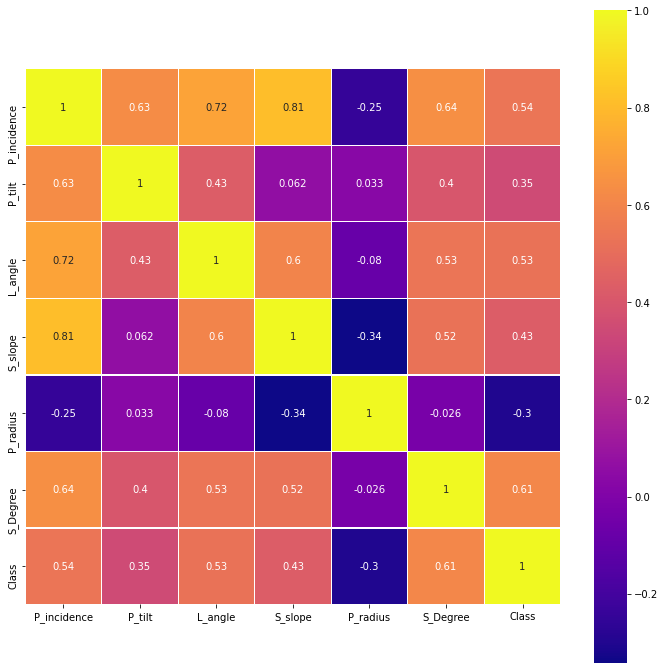

In [ ]:
# Plot the correlation between each feature using seaborn heatmap function.
colormap = plt.cm.plasma
#colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(corr,square=True, cmap=colormap, linecolor='white',linewidths=0.2, annot=True)

Correlation between s_degree and p_incidence is high. 

**Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.**

In [ ]:
# Compute variance of each variable.
Biomechanics.var()

P_incidence     297.097633
P_tilt          100.166675
L_angle         344.253290
S_slope         180.179672
P_radius        177.352531
S_Degree       1410.680476
Class             0.782963
dtype: float64

All the independent variables variances are having significant values, while the variable S_Degree has a large variance and it was also observed that there are significant outliers.

**Check data distribution using summary statistics and bivariate analysis.**

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables.

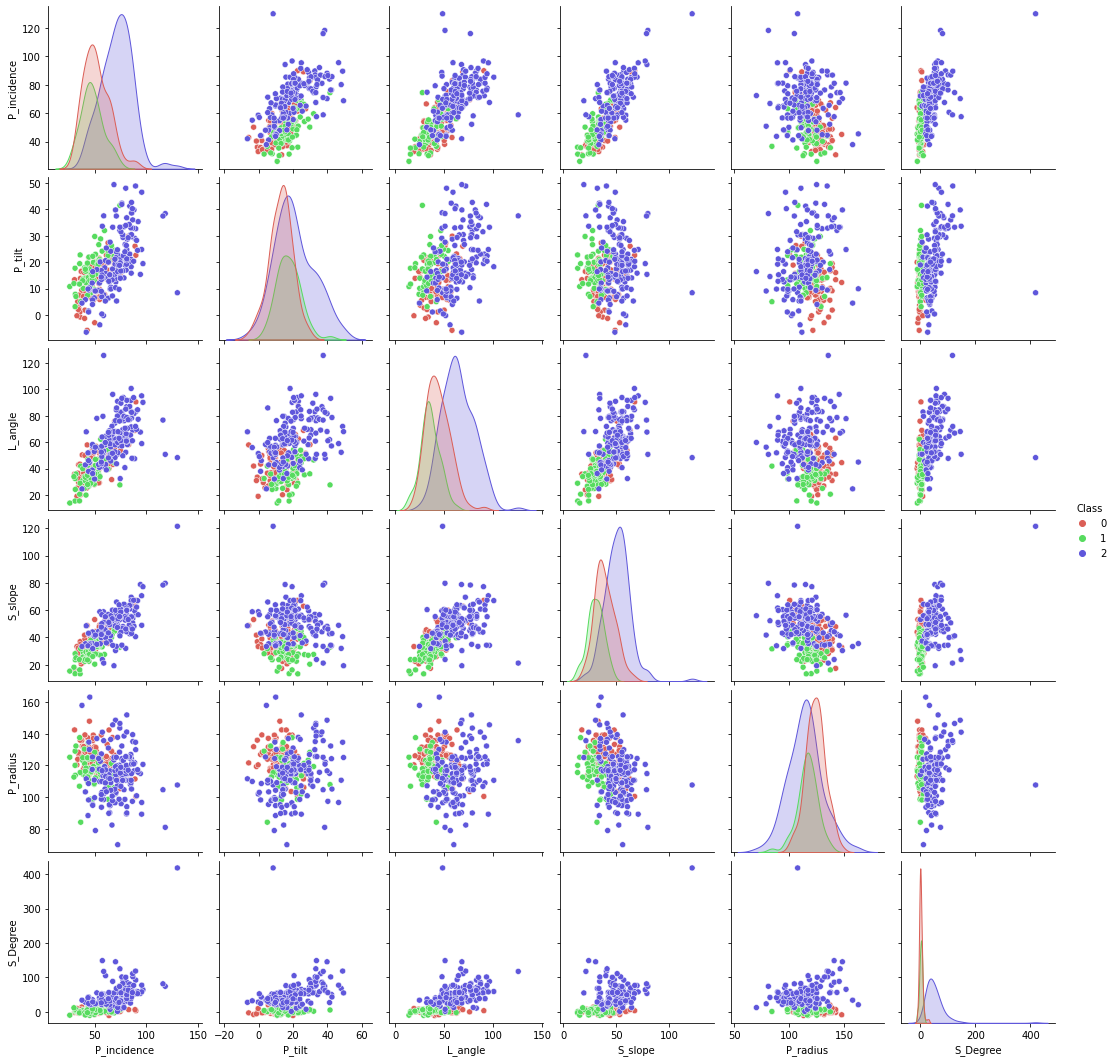

In [ ]:
# Use pairplot to plot the distribution of each variable.
colormap= sns.color_palette("hls", 3)
sns.pairplot(Biomechanics, hue = 'Class',palette=colormap, diag_kind = 'kde')



*   The data points of all the three classes are randomly 
distributed. There is not a strong correlation between any two variables.
*   Type_s class is more compared to other two.
*   Normal class has higher values compared to Type_H
*   Along the diagonal we can see distribution of variable for three claases are not same.

* **To know more about how the features affect the target, we can plot histograms of three classes (Normal, Type_H, Type_S). If the three histograms are separated based on the feature, then we can say that the feature is important to discern the instances.** 

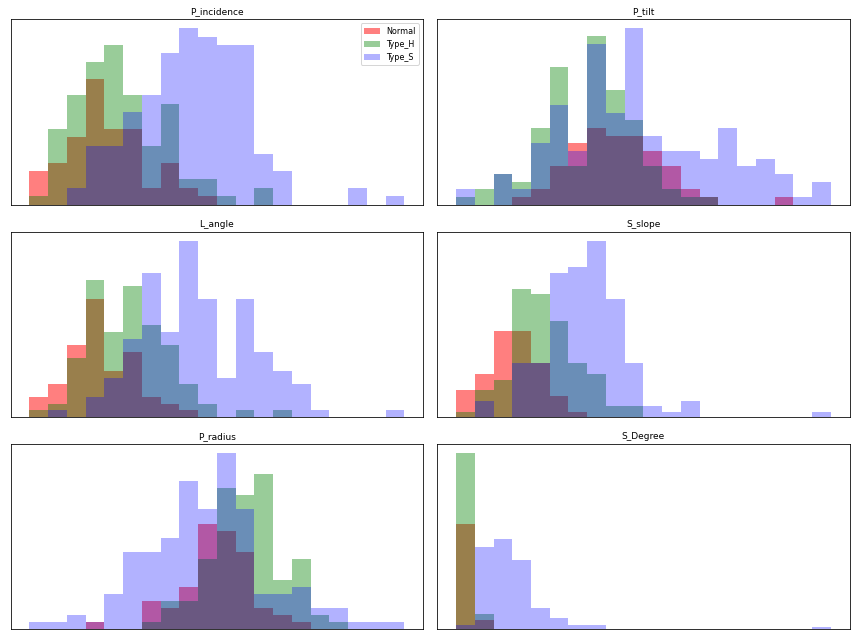

In [ ]:
fig,axes =plt.subplots(3,2, figsize=(12, 9)) # Define the image area and subplots for plotting histograms

Normal = Biomechanics[Biomechanics.Class == 1] # Seperate the data of each class   
Type_H = Biomechanics[Biomechanics.Class == 0]
Type_S = Biomechanics[Biomechanics.Class == 2]

ax=axes.ravel()

for i in range(6):
  _,bins=np.histogram(Biomechanics.iloc[:,i],bins=20)
  ax[i].hist(Normal.iloc[:,i],bins=bins,color='r',alpha=.5) 
  ax[i].hist(Type_H.iloc[:,i],bins=bins,color='g',alpha=.4) 
  ax[i].hist(Type_S.iloc[:,i],bins=bins,color='b',alpha=.3) 
  ax[i].set_title(Biomechanics.columns[i],fontsize=9)
  ax[i].axes.get_xaxis().set_visible(False) # the x-axis co-ordinates are not so useful, as we just want to look how well separated the histograms are
  ax[i].set_yticks(())

ax[0].legend(['Normal','Type_H','Type_S'],loc='best',fontsize=8)
plt.tight_layout()# let's make good plots
plt.show()

Now from these histograms we see that all features has very little role to play in discerning three classes seperately.

# **4. Data pre-processing:**

• Segregate predictors vs target attributes

• Perform normalisation or scaling if required.

• Check for target balancing. Add your comments.

• Perform train-test split.

**Check distribution of target variable, 'Class' and plot it to check target balancing** 

In [ ]:
Biomechanics.Class.value_counts(normalize=True)

2    0.483871
0    0.322581
1    0.193548
Name: Class, dtype: float64

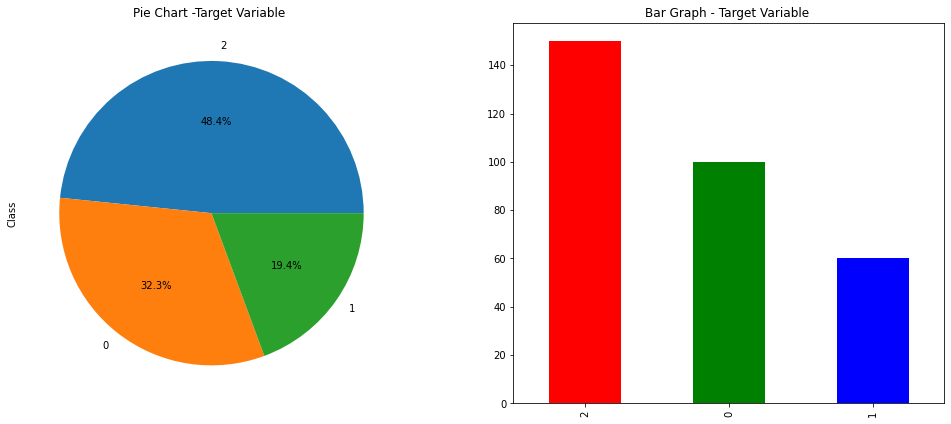

In [ ]:
fig,axes=plt.subplots(1,2,figsize=(17,7))
Biomechanics['Class'].value_counts().plot.pie(autopct='%1.1f%%',ax=axes[0])
Biomechanics.Class.value_counts().plot(color = ['red', 'green','blue'],kind='bar',ax=axes[1])
axes[0].set_title('Pie Chart -Target Variable ')
axes[1].set_title('Bar Graph - Target Variable ')
plt.show()

***The above graph shows that the data is biased towards datapoints having class value as 2 -'Type _S'. The number of data points of Class 1 - 'Type_H' is almost half the number of 'Type_S patients.***

In [ ]:
Biomechanics.groupby(["Class"]).count()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
Class,,,,,,
0,100,100,100,100,100,100
1,60,60,60,60,60,60
2,150,150,150,150,150,150


**Normal: 0**

**Type_H: 1**

**Type_S: 2**

**The ratio of distribution of three classes is 32: 19 : 48, which shows imbalance of class i.e. Target Variable.**

**Imputing outliers with the mean value of independent variable.**

In [ ]:
# Get outliers from each independent variable and compute the mean of independent variable

columns=['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']
for i in columns:
    #getting upper and lower quartile values
    Quartile25,Quartile75 = np.percentile(Biomechanics[i],25),np.percentile(Biomechanics[i],75)

    IQR = Quartile75 - Quartile25

    Threshold = IQR * 1.5

    lower = Quartile25 - Threshold
    upper= Quartile75 + Threshold

    Outliers=[j for j in Biomechanics[i] if j < lower or j > upper]

    #taking mean of a column without considering outliers

    df_mean = Biomechanics.loc[(Biomechanics[i] >= lower) & (Biomechanics[i] <= upper)]
    mean = int(df_mean[i].mean())
    print('Mean of {} is {}'.format(i,mean))
    #print('\n')

    #imputing outliers with mean

    Biomechanics[i]=np.where(Biomechanics[i]>upper,mean,Biomechanics[i])
    Biomechanics[i]=np.where(Biomechanics[i]<lower,mean,Biomechanics[i])
    Outliers=[j for j in Biomechanics[i] if j < lower or j > upper]
    print('Total Number of outliers in {} After Imputing : {}'.format(i,len(Outliers)))

Mean of P_incidence is 59
Total Number of outliers in P_incidence After Imputing : 0
Mean of P_tilt is 16
Total Number of outliers in P_tilt After Imputing : 0
Mean of L_angle is 51
Total Number of outliers in L_angle After Imputing : 0
Mean of S_slope is 42
Total Number of outliers in S_slope After Imputing : 0
Mean of P_radius is 118
Total Number of outliers in P_radius After Imputing : 0
Mean of S_Degree is 22
Total Number of outliers in S_Degree After Imputing : 0


In [ ]:
# Biomechanics = Biomechanics.drop(labels= "P_radius",axis = 1) # Drop the variable "P_radius" as it has less correlation with the target variable.

**Segregate predictors vs target attributes**

In [ ]:
# Create a separate dataframe consisting only of the features i.e independent attributes 
# and a dataframe of target variable

X = Biomechanics.drop(labels= "Class" , axis = 1) # Feature set
y = Biomechanics["Class"] # Target variable
X.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910


# **Perform normalisation or scaling.**

Convert the features by performing standard scaling as we do not know what units / scales were used and store them in new dataframe.

**It is always advisable to bring all the features to the same scale for applying distance based algorithms like KNN.** 


In [ ]:
#standardization of data

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X_std = pd.DataFrame(StandardScaler().fit_transform(X))
X_std.columns = X.columns

In [ ]:
X_std.head() # Scaled Features

,P_incidence,P_tilt,L_angle,S_slope,S_Degree
0,-1.327329,0.049553,-0.918802,-1.674307,-0.563982
1,-0.308608,0.288410,-0.004898,-0.533804,-0.801576
2,-0.963841,-0.906150,-0.265366,-0.576173,-0.682778
3,-0.718311,0.107693,-0.204513,-0.936273,-0.917200
4,-0.880726,-0.701822,-0.505043,-0.605860,-1.015570


In [ ]:
#split the dataset into training and test datasets

from sklearn.model_selection import train_test_split

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3,random_state=10)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(217, 6)
(217,)


In [ ]:
print(X_test.shape)
print(y_test.shape)

(93, 6)
(93,)


# **5. Model training, testing and tuning:**
• Design and train a KNN classifier.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Automate the task of finding best values of K for KNN.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model

**Build the model and train and test on training and test sets respectively using scikit-learn.**

*   Design and train a KNN classifier.
*   Display the classification accuracies for train and test data.
*   Display and explain the classification report in detail.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score

Train_score =[]
Test_score =[]

for k in range(1,50):
    NNH = KNeighborsClassifier(n_neighbors = k, metric = 'euclidean', weights = 'distance' )
    NNH.fit(X_train, y_train)
    Train_score.append(NNH.score(X_train, y_train))
    Test_score.append(NNH.score(X_test, y_test))

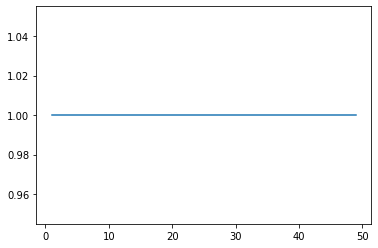

In [ ]:
plt.plot(range(1,50),Train_score)
plt.show()

The model is overfitting on training dataset for all the values of k.

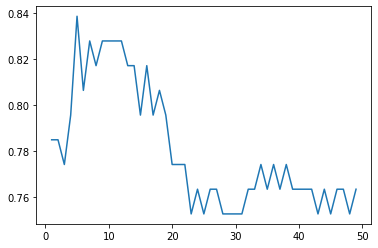

In [ ]:
plt.plot(range(1,50),Test_score)
plt.show()

**On test data model have higher accuracies for value of k less than 20. Let's choose k less than 20 to find best value of k.**

In [ ]:
# loading library
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import recall_score

# instantiate learning model (k = 3)
knn = KNeighborsClassifier(n_neighbors = 3, weights = 'distance')

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy and generate classification report
print('The accuracy score and Classification Report with K = 3 \n')
print('The model accuracy on test data is :' ,accuracy_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

# instantiate learning model (k = 5)
knn = KNeighborsClassifier(n_neighbors=5, weights = 'distance')
# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy and generate classification report
print('The accuracy score and Classification Report with K = 5 \n')
print('The model accuracy on test data is :' ,accuracy_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))

# instantiate learning model (k = 7)
knn = KNeighborsClassifier(n_neighbors=7, weights = 'distance')

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy and generate classification report
print('The accuracy score and Classification Report with K = 7 \n')
print('The model accuracy on test data is :' ,accuracy_score(y_test, y_pred),'\n')
print(classification_report(y_test, y_pred))


The accuracy score and Classification Report with K = 3 

The model accuracy on test data is : 0.7741935483870968 

              precision    recall  f1-score   support

           0       0.68      0.54      0.60        28
           1       0.50      0.72      0.59        18
           2       0.98      0.94      0.96        47

    accuracy                           0.77        93
   macro avg       0.72      0.73      0.72        93
weighted avg       0.80      0.77      0.78        93

The accuracy score and Classification Report with K = 5 

The model accuracy on test data is : 0.8387096774193549 

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.62      0.83      0.71        18
           2       0.98      0.94      0.96        47

    accuracy                           0.84        93
   macro avg       0.80      0.82      0.80        93
weighted avg       0.85      0.84      0.84        93

The ac

**For the given problem, the prediction is to be made about the patient's condition (normal or abnormal), thus False Negative (FN) predictions can lead to serious problem as the patient with abnormal condition will be treated as normal, and no treatment will be given.**

In such scenario **Recall value plays an importance** in determining model performance.

Evaluating performance of the above models, it is observed that the **KNN Classifier with K = 5 provide better Recall values and F1 Score** compare to other models. 

Further it perform well on test data points of Class 2:"Type_S", as there more training samples of Class 2 are used in training Dataset.
While for Class 0 - "Type_H" has less number of samples in training set.

# **Computing the confusion Matrix**

The Confusion Matrix :
 [[20  7  1]
 [ 4 14  0]
 [ 3  1 43]]


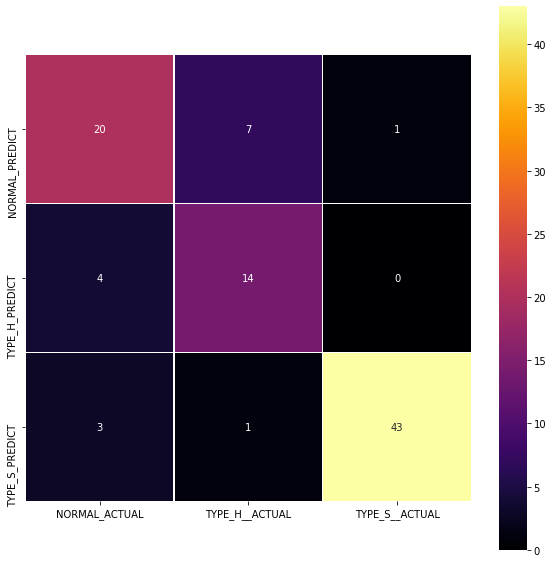

In [ ]:
from sklearn import metrics

cm =metrics.confusion_matrix(y_test,y_pred)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.inferno
plt.figure(figsize=(10,10))
sns.heatmap(cm, xticklabels=['NORMAL_ACTUAL', 'TYPE_H__ACTUAL','TYPE_S__ACTUAL'],yticklabels= ['NORMAL_PREDICT', 'TYPE_H_PREDICT','TYPE_S_PREDICT'],square=True, cmap=colormap, linecolor='white', linewidths= 0.2, annot=True)

There are some **False Negative** values for the Class **"Normal" and "Type_H".**

**The prediction of class "Type_S" has no errors.**

As the training dataset is slightly imbalance, hence we can observe the misclassification error on test dataset.

**Automate the task of finding best values of K for KNN.**

In [ ]:
# creating list of K as odd values for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

In [ ]:
# empty list that will hold accuracy scores
ac_scores = []
Recall_scores =[]

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
    # Evaluate Recall Score
    scores_r = recall_score(y_test, y_pred,average='macro')
    Recall_scores.append(scores_r)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]
MSE_R = [1 - x for x in Recall_scores]

# determining best k based on accuracy score
optimal_k = neighbors[MSE.index(min(MSE))]
print("Based on accuracy score, The optimal number of neighbors is %d" % optimal_k)

# determining best k based on Recall score
optimal_k_R = neighbors[MSE_R.index(min(MSE_R))]
print("Based on Recall score, The optimal number of neighbors is %d" % optimal_k_R)

Based on accuracy score, The optimal number of neighbors is 5
Based on Recall score, The optimal number of neighbors is 5


**Plot misclassification error vs k (with k value on X-axis) using matplotlib.**

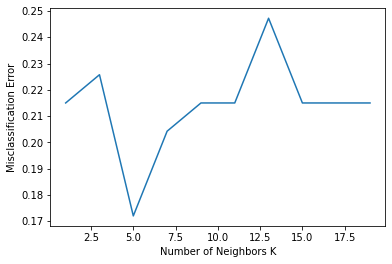

In [ ]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Thus from the automated process as well as misclassification error plot, we can conclude that the **model that gives better performance** in terms of accuracy and Recall value is using **5 nearest Neighbors( K = 5 ).**

**• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model**

### **THE FINAL BEST MODEL USING K=5**

In [ ]:
# Use k=5 as the final model for prediction

knn = KNeighborsClassifier(n_neighbors = 5,weights='distance')

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_pred = knn.predict(X_test)

# evaluate accuracy and Recall scores
print('The Training Score :{:.2f}'.format(knn.score(X_train,y_train)*100))
print('The Test Score :{:.2f}'.format(knn.score(X_test,y_test)*100),'\n')

print('The accuracy score of final trained model on test data is: {:.2f}'.format(accuracy_score(y_test, y_pred)))
print('The Recall score of final trained model on test data is : {:.2f}'.format(recall_score(y_test, y_pred,average='macro')))

The Training Score :100.00
The Test Score :82.80 

The accuracy score of final trained model on test data is: 0.83
The Recall score of final trained model on test data is : 0.81


Training Acuracy is 100 % and Testing Accuracy is 83%. Performance is less in test data.

This is due to overfitting of data

## **Performance Evaluation of the Final Model.**

In [ ]:
#computing Confusion Matrix
from sklearn import metrics


cm =metrics.confusion_matrix(y_test,y_pred)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.YlGnBu
plt.figure(figsize=(10,10))
sns.heatmap(cm, xticklabels=['NORMAL_ACTUAL', 'TYPE_H__ACTUAL','TYPE_S__ACTUAL'],yticklabels= ['NORMAL_PREDICT', 'TYPE_H_PREDICT','TYPE_S_PREDICT'],square=True, cmap=colormap, linecolor='black', linewidths =0.5,annot=True)
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

ValueError: ignored

**The confusion matrix is a technique used for summarizing the performance of a classification algorithm.**


*   Cases in which the predicted is YES (they have the abnormal condition -'Type_H' and'Type_S'), and they do have the disease will be termed as TRUE POSITIVES (TP).

*   Cases in which it is predicted NO (they do not have the disease-normal condistion), and they don’t have the disease will be termed as TRUE NEGATIVES (TN).

*   Cases in which it is predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

*   Cases in which it is predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

In [ ]:
# Classification Report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73        28
           1       0.62      0.83      0.71        18
           2       0.98      0.94      0.96        47

    accuracy                           0.84        93
   macro avg       0.80      0.82      0.80        93
weighted avg       0.85      0.84      0.84        93



Classification report shows the precision, recall, F1 and support scores for the classification model.

Precision of 2 ('Type_S') represents that for all patients predicted as Type_S, the percentage of patients that actually have Type_S is 98 %.

Recall is the ability of a classifier to find all positive instances. Recall of 2 indicates that for all patients that actually DO NOT have Type_S disease, the model predicts 98 % correctly that patients do not have Type_S disease.

Similar explanation can be given on other classes(0 and 1).

**ROC CURVE**

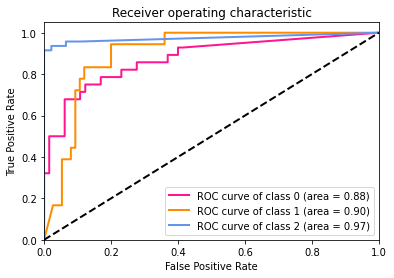

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3,random_state=10)

knn_cv = KNeighborsClassifier(n_neighbors=5)

y_score = knn.predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

lw =2
colors = cycle(['deeppink', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


**Receiver Operating Characteristic (ROC) is a metric to evaluate classifier output quality.**

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

The evaluation measure for multi-label classification is macro-averaging, which gives equal weight to the classification of each label.

# **6. Conclusion and improvisation:**

• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the research team to perform a better data analysis in future.

# **Conclusion:**
# **The final model uses k=5 for prediction and has a good accuracy as well as recall score**

## Model Accuracy : 84 %

## Model Macro Average Recall Score : 82 %

**For every test data point, KNN Classifier predict it's label based on 5 nearest neighbours in this model. The majority class will be assigned to the test data point**

All the variables has significant effect on target class

Type_s class has higher data points and hence predicted model gives best results for this class.

For Knn, k=5 we are getting balanced train and test error.

We can use KNN as a final model because of balanced train and test error also the recall and precision values are good.


**Suggestions:** 


*   More accurate prediction can be made if classes in dataset are balanced.
*   We can imagine how the feature with greater range will overshadow or dimenish the smaller feature completely and this will impact the performance of all distance based model as it will give higher weightage to variables which have higher magnitude.
*  If the dataset includes more number of data points or larger dataset will also help imorovising the model.
*  The clarity about the measuring scale of all the features is defined then, it will help better understanding the dataset.
*   Clear description on each variables may help to understand problem statement better because of medical domain.

# **PART 2 (PROJECT BASED)**

**• DOMAIN:** Banking and finance

**• CONTEXT:** 
A bank X is on a massive digital transformation for all its departments. Bank has a growing customer base whee
majority of them are liability customers (depositors) vs borrowers (asset customers). The bank is interested in expanding the borrowers base rapidly to bring in more business via loan interests. A campaign that the bank ran in last quarter showed an average single digit conversion rate. Digital transformation being the core strength of the business strategy, marketing
department wants to devise effective campaigns with better target marketing to increase the conversion ratio to double digit with same budget as per last campaign.

**• DATA DESCRIPTION:** 

The data consists of the following attributes:

1. ID: Customer ID
2. Age Customer’s approximate age.
3. CustomerSince: Customer of the bank since. [unit is masked]
4. HighestSpend: Customer’s highest spend so far in one transaction. [unit is masked]
5. ZipCode: Customer’s zip code.
6. HiddenScore: A score associated to the customer which is masked by the bank as an IP.
7. MonthlyAverageSpend: Customer’s monthly average spend so far. [unit is masked]
8. Level: A level associated to the customer which is masked by the bank as an IP.
9. Mortgage: Customer’s mortgage. [unit is masked]
10. Security: Customer’s security asset with the bank. [unit is masked]
11. FixedDepositAccount: Customer’s fixed deposit account with the bank. [unit is masked]
12. InternetBanking: if the customer uses internet banking.
13. CreditCard: if the customer uses bank’s credit card.
14. LoanOnCard: if the customer has a loan on credit card.

**• PROJECT OBJECTIVE:** 

Build an AIML model to perform focused marketing by predicting the potential customers who will convert using the historical dataset.




**1. Import and warehouse data:**

• Import all the given datasets and explore shape and size of each.

• Merge all datasets onto one and explore final shape and size.

In [2]:
data1 = pd.read_csv('/content/drive/MyDrive/AIML-GL/SL PROJECT/Part2 - Data1.csv')
data2 = pd.read_csv('/content/drive/MyDrive/AIML-GL/SL PROJECT/Part2 -Data2.csv')

In [ ]:
data1.shape

(5000, 8)

In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB


In [ ]:
data1.sample(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
497,498,48,22,94,90623,4,2.6,3
2729,2730,58,34,63,90007,4,1.5,1
1818,1819,45,20,62,95818,2,2.2,3
1128,1129,30,5,171,94025,2,1.9,2
1260,1261,57,31,40,91107,3,1.4,3


In [ ]:
data2.shape

(5000, 7)

In [ ]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB


In [ ]:
data2.sample(5)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
3588,3589,0,0,0,1,0,0.0
3104,3105,0,0,0,0,1,0.0
344,345,138,0,0,1,1,0.0
2439,2440,144,0,0,0,1,0.0
3562,3563,272,1,1,1,0,1.0


**2. Data cleansing:**

• Explore and if required correct the datatypes of each attribute

• Explore for null values in the attributes and if required drop or impute values.

In [ ]:
data2.isnull().sum()


ID                      0
Mortgage                0
Security                0
FixedDepositAccount     0
InternetBanking         0
CreditCard              0
LoanOnCard             20
dtype: int64

**LoanOnCard has 20 Null values. Let's replace Null values with 0.**

In [3]:
data2['LoanOnCard'] = data2['LoanOnCard'].fillna(0)

In [ ]:
data2.isnull().sum()

ID                     0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

**Merge both the  datasets onto one and explore final shape and size.** 

In [4]:
BankRecords = data1.merge(data2, on='ID')


In [ ]:
BankRecords.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [ ]:
BankRecords.shape

(5000, 14)

There are 5000 observations in this dataset. Each represents an existing customer of the bank. 

For each observation, the dataset records 14 input variables that stand for both qualitative and quantitative attributes of the customer, such as age, HighestSpend, MonthlyAverageSpend, Mortgage and Security, FixedDepositAccount, CreditCard, and LoanOnCard.

There is a binary output variable that denotes “yes” or “no” revealing the LoanOnCard. 

In [ ]:
BankRecords.describe()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.104400,0.06040,0.596800,0.294000,0.096000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.305809,0.23825,0.490589,0.455637,0.294621
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.00000,1.000000,1.000000,0.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.00000,1.000000,1.000000,1.000000


In [ ]:
BankRecords.isnull().sum()

ID                     0
Age                    0
CustomerSince          0
HighestSpend           0
ZipCode                0
HiddenScore            0
MonthlyAverageSpend    0
Level                  0
Mortgage               0
Security               0
FixedDepositAccount    0
InternetBanking        0
CreditCard             0
LoanOnCard             0
dtype: int64

In [ ]:
BankRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   int64  
 10  FixedDepositAccount  5000 non-null   int64  
 11  InternetBanking      5000 non-null   int64  
 12  CreditCard           5000 non-null   int64  
 13  LoanOnCard           5000 non-null   float64
dtypes: float64(2), int64(12)
memory usage: 585.9 KB


In [5]:
# Changing datatypes of categorical features

cols=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']
for i in cols:
    BankRecords[i]=BankRecords[i].astype('category')

Drop "ID" column as it do not contain any meaningful information

In [6]:
BankRecords = BankRecords.drop(labels= "ID" , axis = 1)

**3. Data analysis & visualisation:**

• Perform detailed statistical analysis on the data.

• Perform a detailed univariate, bivariate and multivariate analysis with appropriate detailed comments after each analysis.

## **Univariate analysis:** 

**Visualize the distribution of 'age', 'HighestSpend' and 'MonthlyAverageSpend'.**

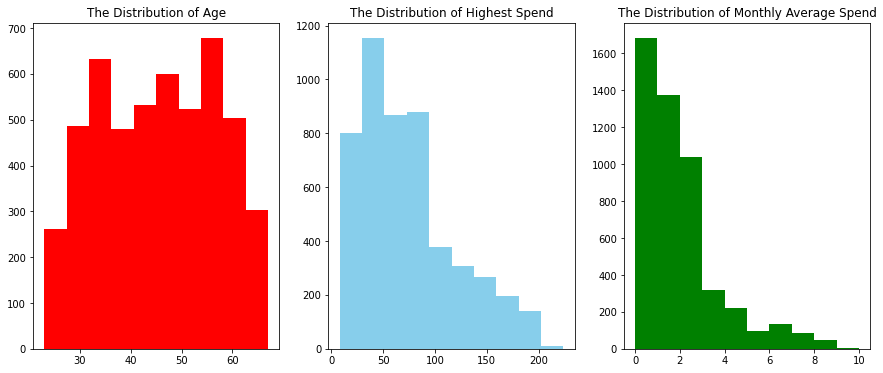

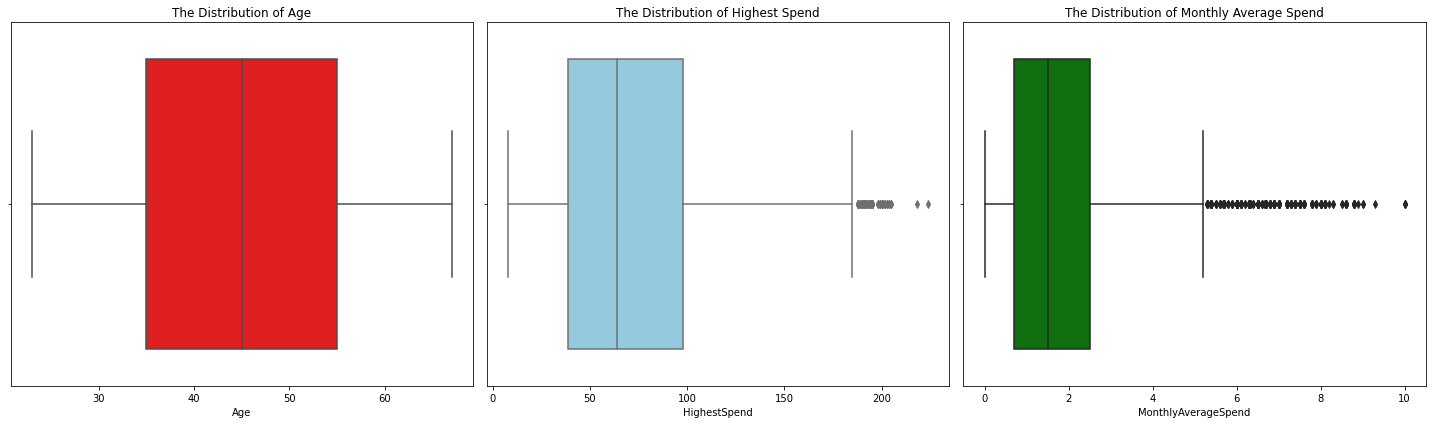

In [6]:
fig = plt.figure(figsize = (15,6))

ra1 = fig.add_subplot(1,3,1) 
ra2 = fig.add_subplot(1,3,2)
ra3 = fig.add_subplot(1,3,3)

ra1.hist(BankRecords['Age'],color = 'red')
ra1.set_title('The Distribution of Age')

ra2.hist(BankRecords['HighestSpend'],color = 'skyblue')
ra2.set_title('The Distribution of Highest Spend')

ra3.hist(BankRecords['MonthlyAverageSpend'],color = 'green')
ra3.set_title('The Distribution of Monthly Average Spend')


plt.figure(figsize=(20,6))
plt.subplot(1, 3, 1)
plt.title('The Distribution of Age')
sns.boxplot(BankRecords['Age'],color='red')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('The Distribution of Highest Spend')
sns.boxplot(BankRecords['HighestSpend'],orient='vertical',color= 'skyblue')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('The Distribution of Monthly Average Spend')
sns.boxplot(BankRecords['MonthlyAverageSpend'],color='green')

plt.tight_layout() 
plt.show()



The distribution of age: The bank have an extensive age range, from 23 to 67 years old. However, a majority of customers are in the age of 30s and 55s (35 to 55 years old fall within the 25th to 75th percentiles). The **distribution of customer age is fairly normal with a small standard deviation.**

The Distribution of **Highest Spent** amount  and **Monthly Average Spend** is right skewed and Highest spend amount is in the range of 40 to 60 units. While maximum Monthly Average Spend is in the range 0 to 3 units.

There are large **outliers** in Highest Spent amount and significant number of outliers in Monthly Average Spend.

**Visualize the distribution of 'CustomerSince', 'ZipCode' and 'Mortgage'.**

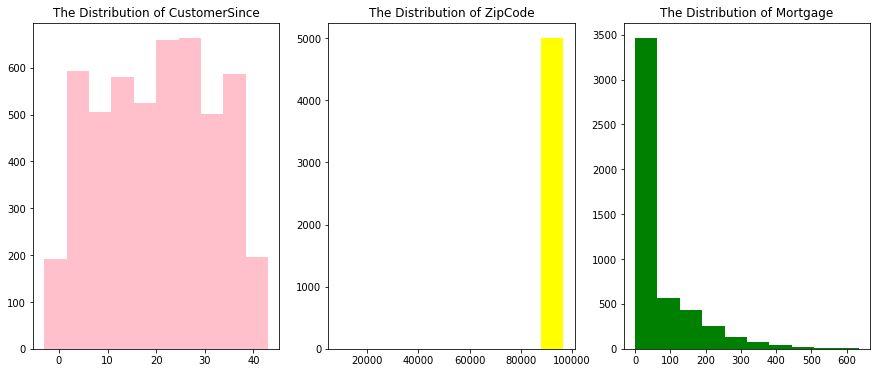

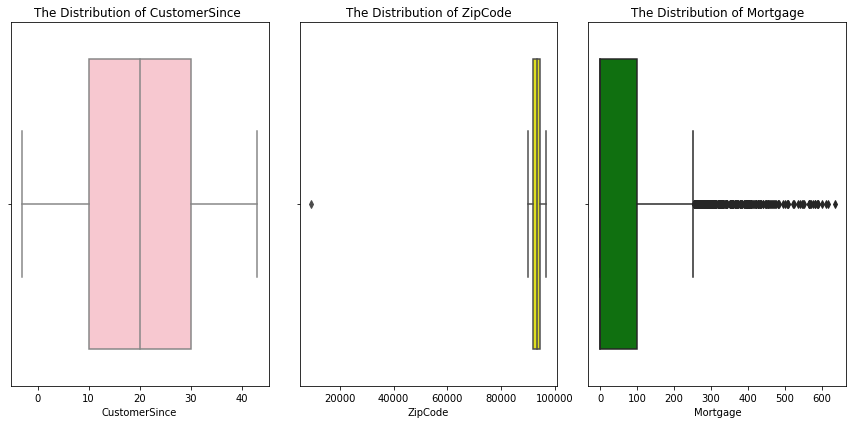

In [ ]:
fig = plt.figure(figsize = (15,6))

ra1 = fig.add_subplot(1,3,1) 
ra2 = fig.add_subplot(1,3,2)
ra3 = fig.add_subplot(1,3,3)

ra1.hist(BankRecords['CustomerSince'],color = 'pink')
ra1.set_title('The Distribution of CustomerSince')

ra2.hist(BankRecords['ZipCode'],color = 'yellow')
ra2.set_title('The Distribution of ZipCode')

ra3.hist(BankRecords['Mortgage'],color = 'green')
ra3.set_title('The Distribution of Mortgage')


plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.title('The Distribution of CustomerSince ')
sns.boxplot(BankRecords['CustomerSince'],color='pink')

# subplot 2
plt.subplot(1, 3, 2)
plt.title('The Distribution of ZipCode')
sns.boxplot(BankRecords['ZipCode'],orient='vertical',color= 'yellow')

# subplot 3
plt.subplot(1, 3, 3)
plt.title('The Distribution of Mortgage')
sns.boxplot(BankRecords['Mortgage'],color='green')

plt.tight_layout() 
plt.show()

We can observe 25 th and 75 th percentile of **customer since** is in the range 10-30. Here the units are masked.

We have no outliers
There is **no proper distribution of the zipcodes**.This column does not add value to the model. We will **drop** during model building.

there is no proper distribution of **Mortgage**, in many of the cases we have zero as value this tell most of the customer doesn't have mortage.

It is observed from the above plots that people who spend High and also have large monthly average spend, takes loan on card.

**Visualise the distribution of Duration, since the client is Customer of the bank.**

The mean period of cutomers as a client of the bank is:  20.1046


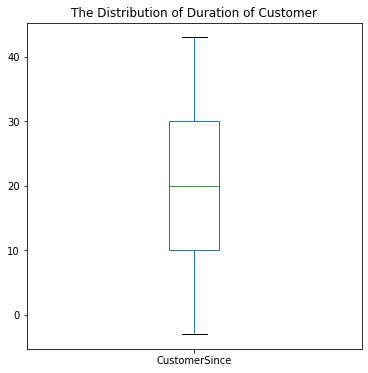

In [ ]:
print('The mean period of cutomers as a client of the bank is: ', BankRecords['CustomerSince'].mean())

#sns.boxplot(BankRecords['CustomerSince'],orient='vertical')
dist_cust_since = BankRecords['CustomerSince'].plot(kind = 'box', figsize = (6,6),title='The Distribution of Duration of Customer')
plt.show()

As the unit for 'CutomerSince' is not specified, let's consider that the duration is in years.

As observed from the box plot, the variable "CustomerSince" follows the normal distribution with the median of 20 years, and interquartile range of 10 to 30 years. 

**Observe the distribution of categorical variables.**

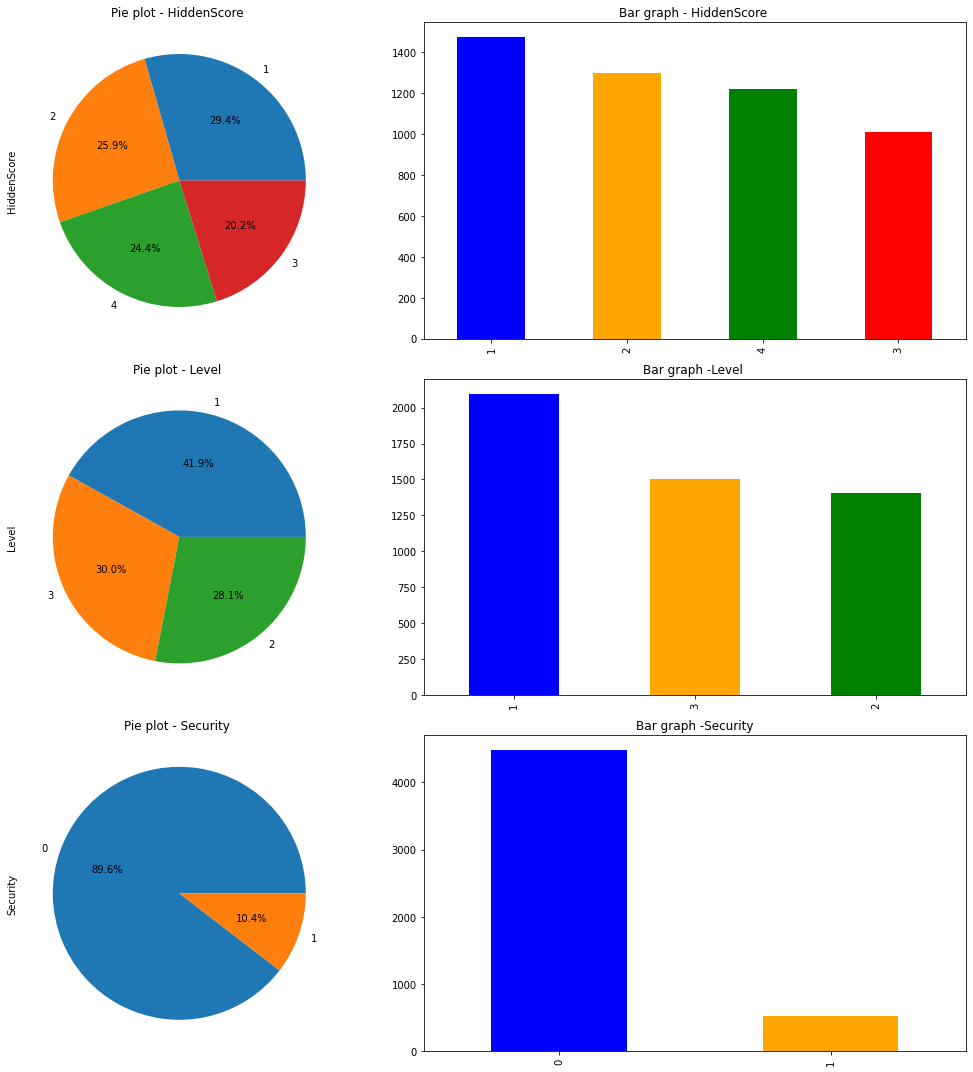

In [ ]:
cols=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

fig = plt.figure(figsize = (15,15))

plt.subplot(3, 2, 1)
plt.title('Pie plot - HiddenScore ')
BankRecords['HiddenScore'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(3, 2, 2)
plt.title('Bar graph - HiddenScore ')
BankRecords.HiddenScore.value_counts().plot(color = ['blue','orange', 'green','red'],kind='bar')

plt.subplot(3, 2, 3)
plt.title('Pie plot - Level ')
BankRecords['Level'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(3, 2, 4)
plt.title('Bar graph -Level ')
BankRecords.Level.value_counts().plot(color = ['blue','orange', 'green','red'],kind='bar')


plt.subplot(3, 2, 5)
plt.title('Pie plot - Security ')
BankRecords['Security'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(3, 2, 6)
plt.title('Bar graph -Security')
BankRecords.Security.value_counts().plot(color = ['blue','orange', 'green','red'],kind='bar')

plt.tight_layout() 
plt.show()


*   It is observed that there are 4 different categories in **Hidden Score** and almost all the values are equal in each category.
*   In **'Level'** there are 3 different categories, values in category 1 are slightly higher that category 0 and 2. Category 0 and 2 have almost equal values.
*  There is high imbalance in **Security** feature. People with no  security are more.

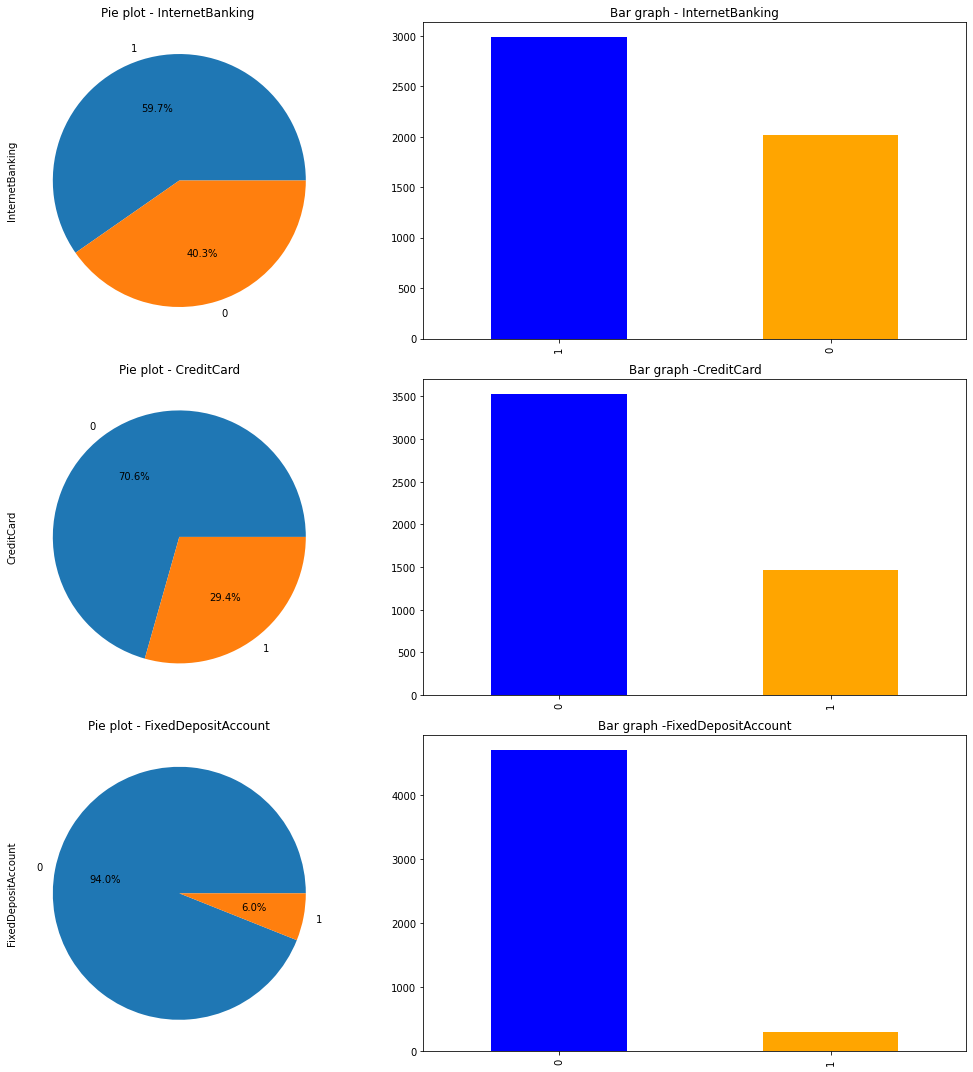

In [ ]:
cols=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

fig = plt.figure(figsize = (15,15))

plt.subplot(3, 2, 1)
plt.title('Pie plot - InternetBanking ')
BankRecords['InternetBanking'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(3, 2, 2)
plt.title('Bar graph - InternetBanking')
BankRecords.InternetBanking.value_counts().plot(color = ['blue','orange', 'green','red'],kind='bar')

plt.subplot(3, 2, 3)
plt.title('Pie plot - CreditCard')
BankRecords['CreditCard'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(3, 2, 4)
plt.title('Bar graph -CreditCard')
BankRecords.CreditCard.value_counts().plot(color = ['blue','orange', 'green','red'],kind='bar')

plt.subplot(3, 2, 5)
plt.title('Pie plot - FixedDepositAccount')
BankRecords['FixedDepositAccount'].value_counts().plot.pie(autopct='%1.1f%%')

plt.subplot(3, 2, 6)
plt.title('Bar graph -FixedDepositAccount')
BankRecords.FixedDepositAccount.value_counts().plot(color = ['blue','orange', 'green','red'],kind='bar')

plt.tight_layout() 
plt.show()


*   It is observed that **60 %** customers are using **internet banking facility** while 40 % do not use.
*  There are **70 % customers** who **use credit card**
*  Very few, only **6 % customers have fixed deposit account**.

## **Bivariate Analysis**

**Visualize the relationship between Continuous variables ('HighestSpend'and 'MonthlyAverageSpend', on Target categorical variable ('LoanOnCard').**

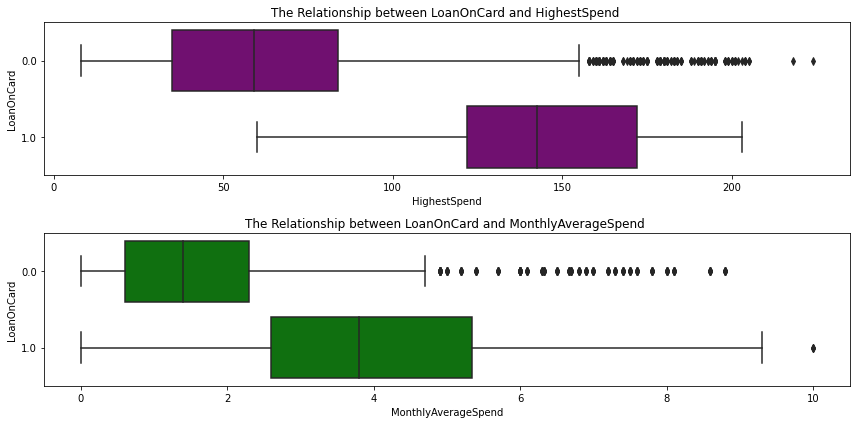

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(2, 1, 1)
plt.title('The Relationship between LoanOnCard and HighestSpend ')
sns.boxplot(x='HighestSpend',y='LoanOnCard',data=BankRecords,color='purple')


plt.subplot(2, 1, 2)
plt.title('The Relationship between LoanOnCard and MonthlyAverageSpend ')
sns.boxplot(x='MonthlyAverageSpend',y='LoanOnCard',data=BankRecords,color='green')

plt.tight_layout()
plt.show()

**Visualize the relationship between 'CustomerSince' & 'LoanOnCard'.**

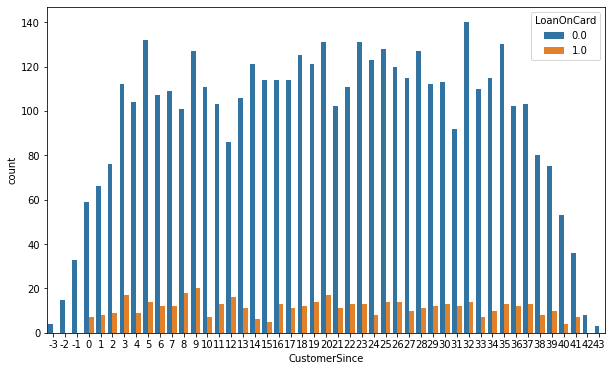

In [ ]:
fig = plt.figure(figsize = (10,6))

sns.countplot(x ='CustomerSince', data = BankRecords,hue='LoanOnCard')

plt.show()

There is no relationship between 'CustomerSince' & 'LoanOnCard' as can be observed from the distribution graph, old and new customers have also taken the loan.

It has equal distribution on loan holders and non-loan holders.

**Analyse the impact of categorical variables on Target Variable  ('LoanOnCard').**


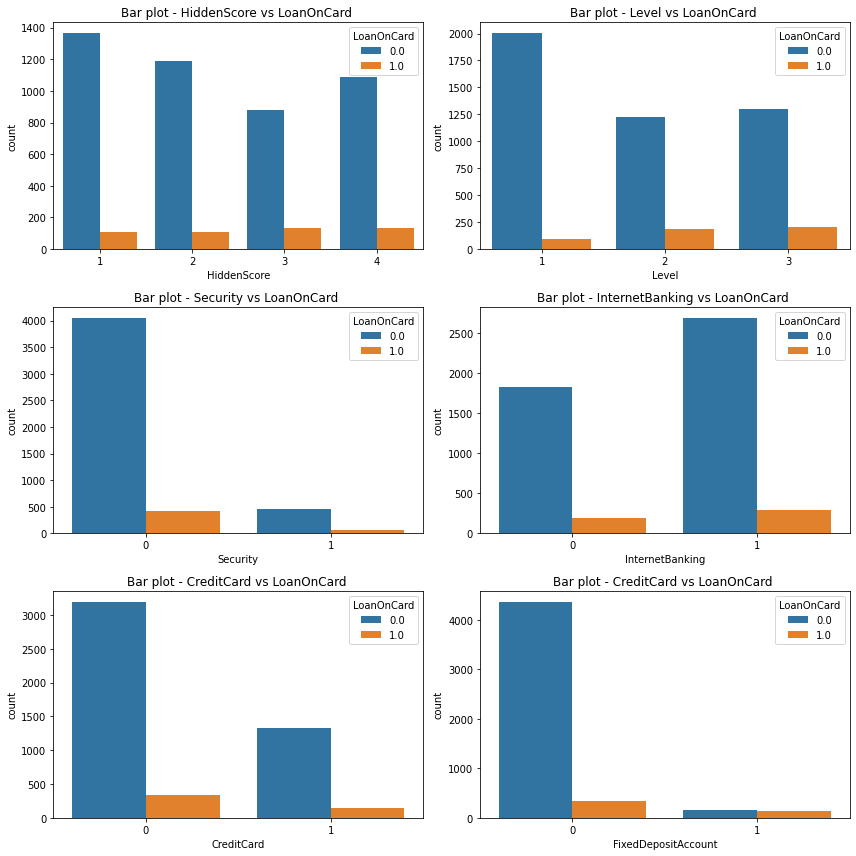

In [ ]:
cols=['HiddenScore','Level','Security','FixedDepositAccount', 'InternetBanking', 'CreditCard', 'LoanOnCard']

plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plt.title('Bar plot - HiddenScore vs LoanOnCard ')
sns.countplot(BankRecords['HiddenScore'],hue=BankRecords['LoanOnCard'])

plt.subplot(3, 2, 2)
plt.title('Bar plot - Level vs LoanOnCard ')
sns.countplot(BankRecords['Level'],hue=BankRecords['LoanOnCard'])

plt.subplot(3, 2, 3)
plt.title('Bar plot - Security vs LoanOnCard ')
sns.countplot(BankRecords['Security'],hue=BankRecords['LoanOnCard'])

plt.subplot(3, 2, 4)
plt.title('Bar plot - InternetBanking vs LoanOnCard ')
sns.countplot(BankRecords['InternetBanking'],hue=BankRecords['LoanOnCard'])

plt.subplot(3, 2, 5)
plt.title('Bar plot - CreditCard vs LoanOnCard ')
sns.countplot(BankRecords['CreditCard'],hue=BankRecords['LoanOnCard'])

plt.subplot(3, 2, 6)
plt.title('Bar plot - CreditCard vs LoanOnCard ')
sns.countplot(BankRecords['FixedDepositAccount'],hue=BankRecords['LoanOnCard'])

plt.tight_layout() 
plt.show()



*   **HiddenScore** for **non Loan holders is more** than Loan holders.
*   **Level 1 is high for Loan Holders** than as seen for Level 2 & 3.
*   **Both Loan takers and non Loan takers** both have **very less** customers with **Credit card.**
*   There are **more customers, who have Loan and Fixed Deposit Account.**
*   **Internet Banking and Security do not have much impact on Loan takers.**

## **Multivariate Analysis**

**Perform a detailed multivariate analysis using scatterplot and correlation matrix.**

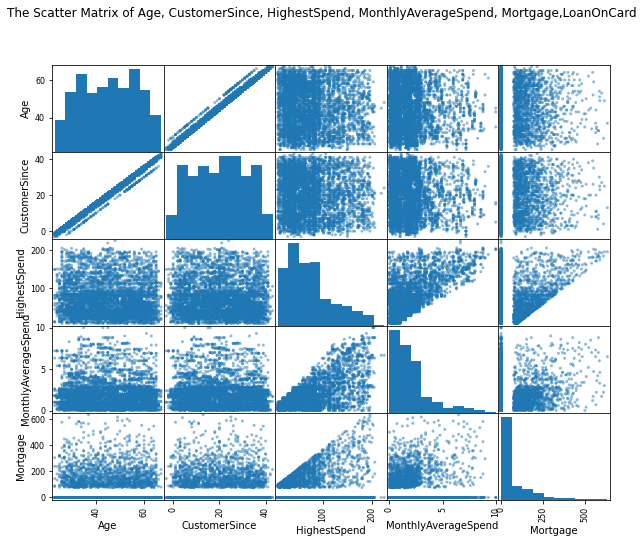

In [ ]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(BankRecords[['Age','CustomerSince','HighestSpend','MonthlyAverageSpend','Mortgage','LoanOnCard']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, CustomerSince, HighestSpend, MonthlyAverageSpend, Mortgage,LoanOnCard')
plt.show()



*   Age and Customer since are linearly related.
*   There is some relation between Highest Spend and Monthly Average Spend.

Check relation between all the feature variables and between feature and target variable.

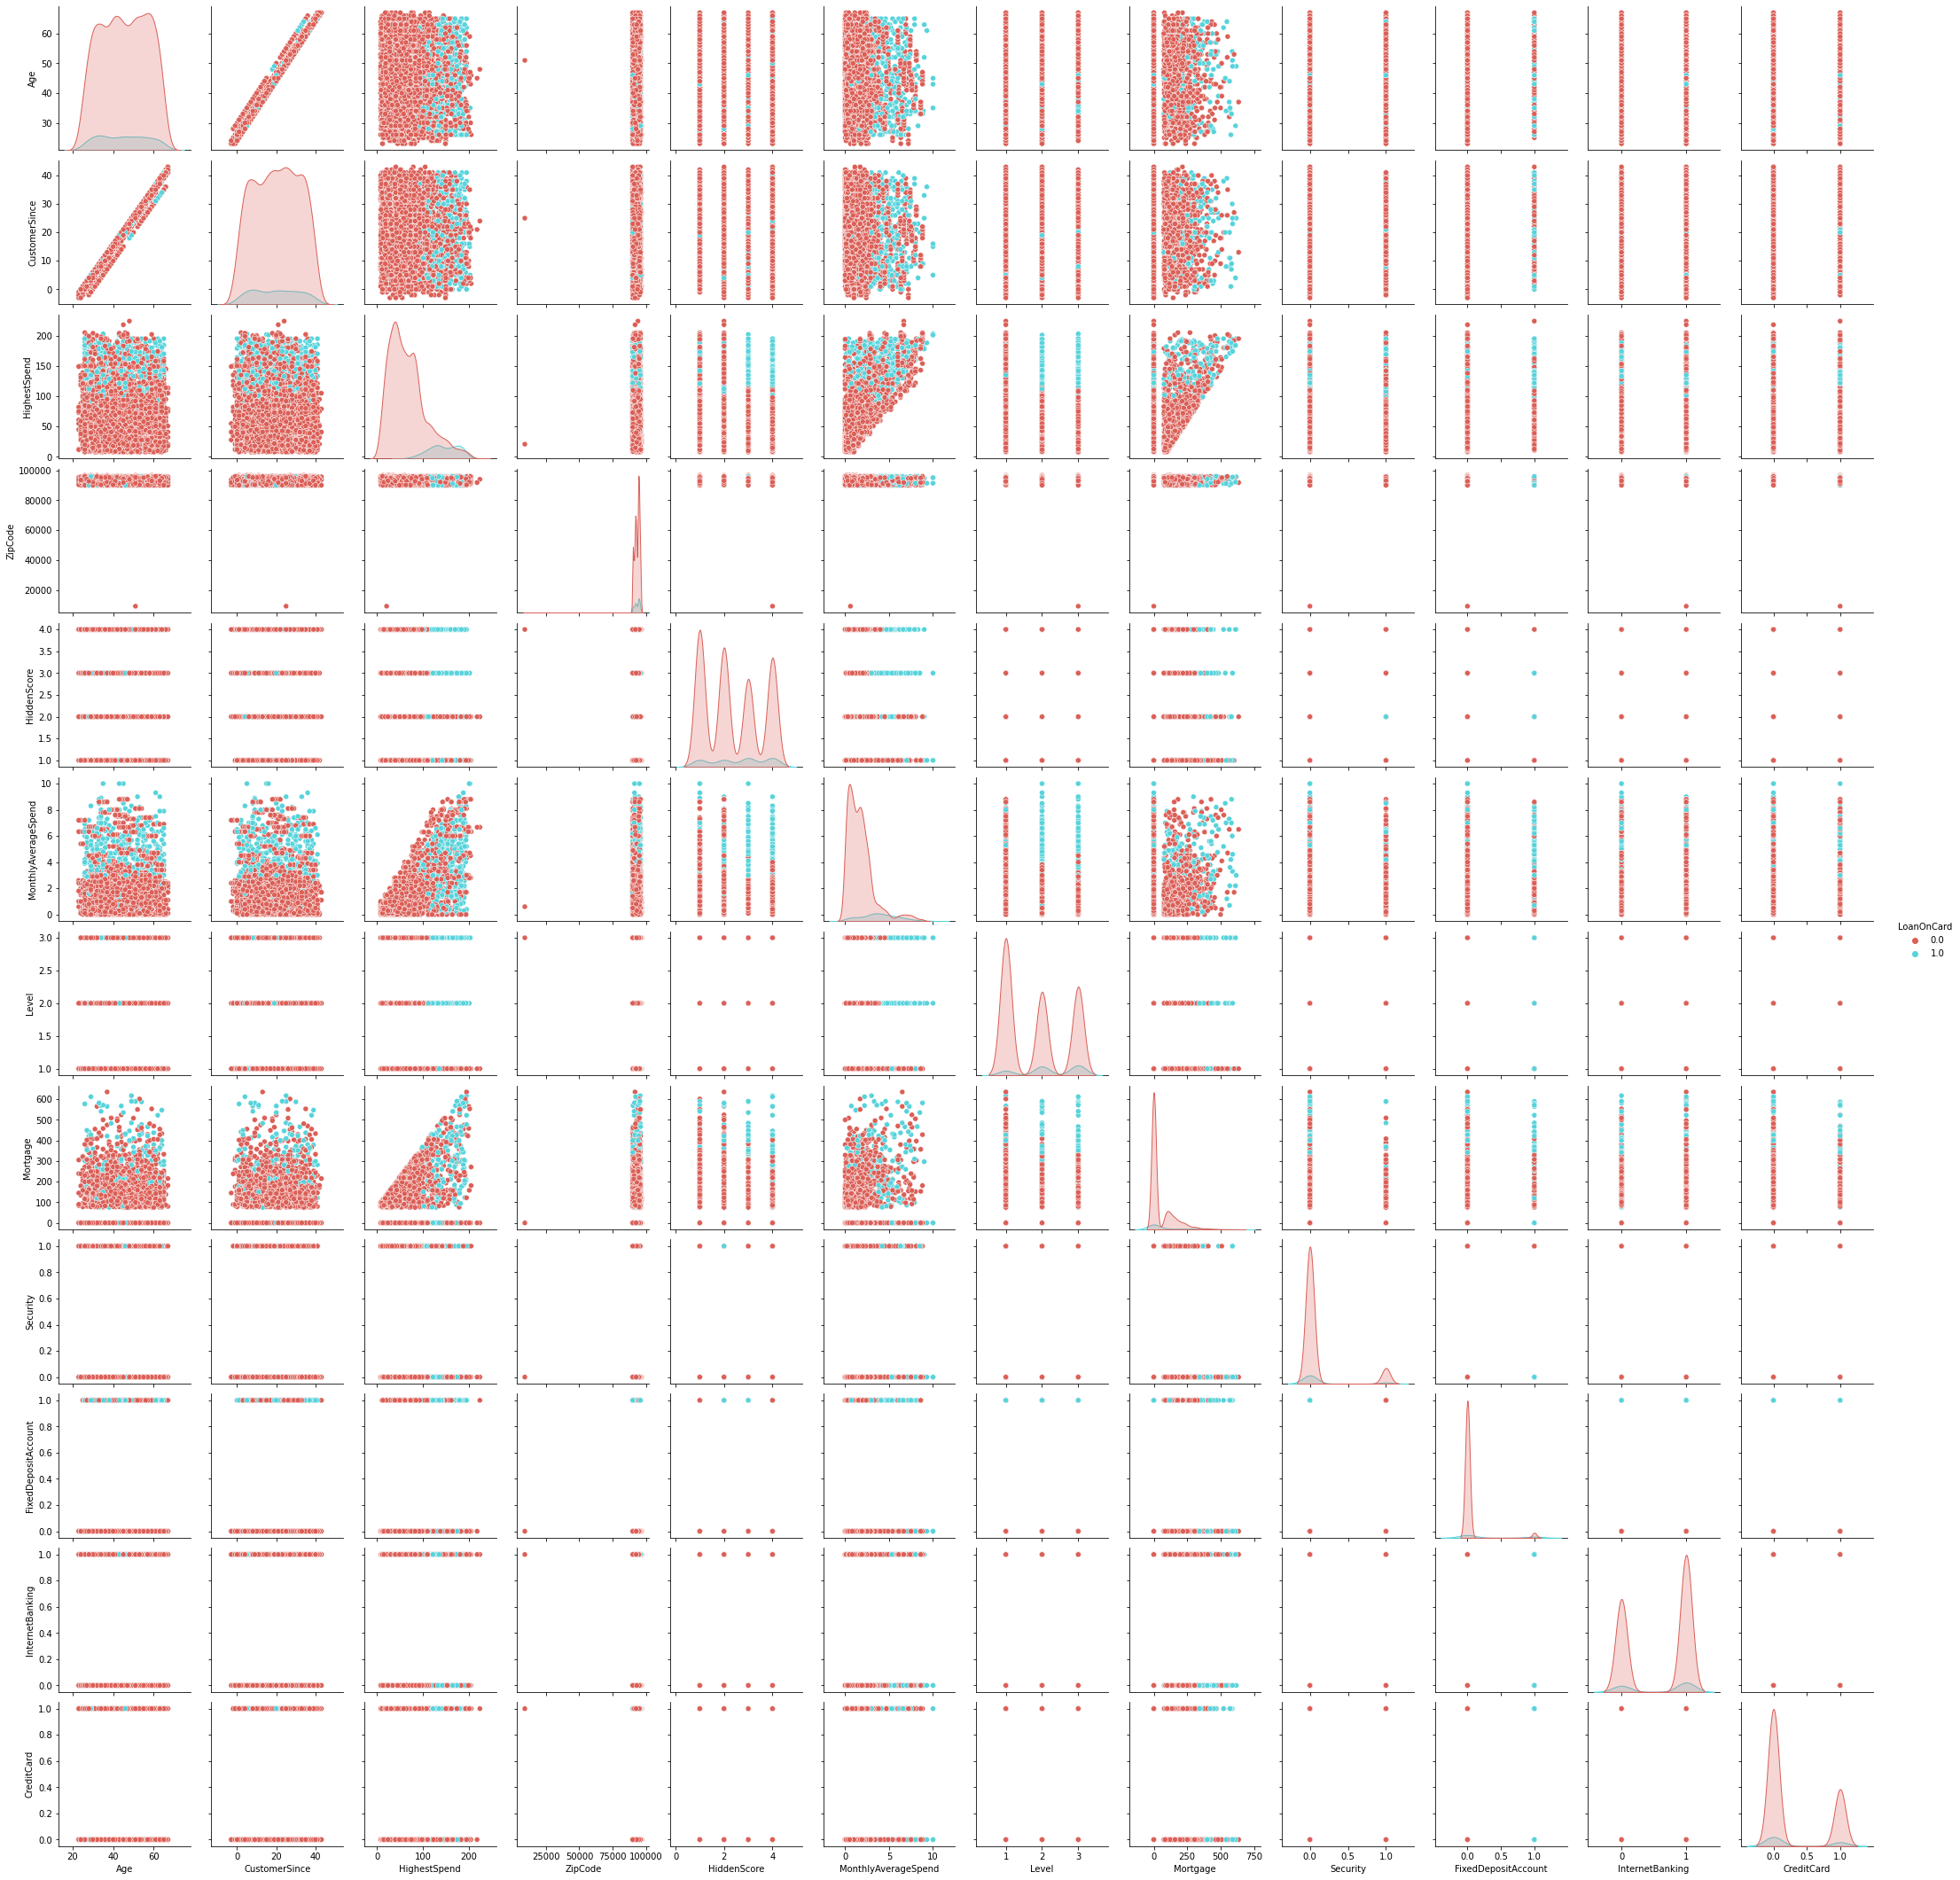

In [ ]:
colormap= sns.color_palette("hls", 2)

sns.pairplot(BankRecords, diag_kind = "kde",palette=colormap, hue = "LoanOnCard")

There is no strong relation between features and target variable.

In [ ]:
corr = BankRecords.corr()

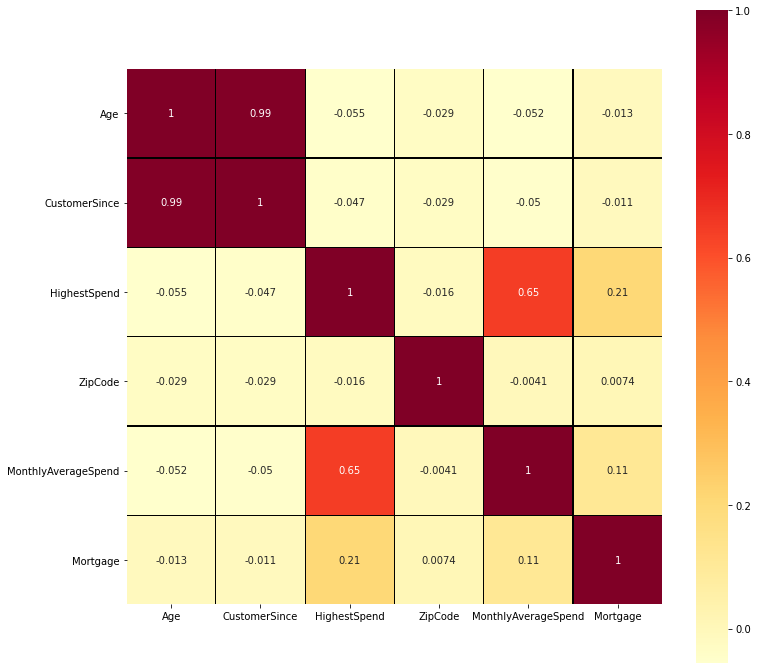

In [ ]:
# Plot the correlation between each feature using seaborn heatmap function.
colormap = plt.cm.YlOrRd
#colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
sns.heatmap(corr,square=True, cmap=colormap, linecolor='black',linewidths=0.2, annot=True)

The scatter matrix and pairplot does not reveal any clear relationship among the independent variables.

To investigate more about correlation, a correlation matrix was plotted with all qualitative variables. Clearly, “'HighestSpend'” has a better correlation with “LoanOnCard”, a moderate correlation with “FixedDepositAmount” and 'MonthlyAverageSpend'.  Their influences on 'LoanOnCard' will be investigated further in the machine learning part.

The features 'HiddenScore', 'Level', 'Mortgage', 'Security','InternetBanking' has very low impact and do not reveal much of the information, hence can be dropped.


**Let's do statistical analysis to check the hypothesis to accept or reject the features**.

In [ ]:
BankRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Age                  5000 non-null   int64   
 1   CustomerSince        5000 non-null   int64   
 2   HighestSpend         5000 non-null   int64   
 3   ZipCode              5000 non-null   int64   
 4   HiddenScore          5000 non-null   category
 5   MonthlyAverageSpend  5000 non-null   float64 
 6   Level                5000 non-null   category
 7   Mortgage             5000 non-null   int64   
 8   Security             5000 non-null   category
 9   FixedDepositAccount  5000 non-null   category
 10  InternetBanking      5000 non-null   category
 11  CreditCard           5000 non-null   category
 12  LoanOnCard           5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 308.4 KB


In [8]:
BankRecords_Copy = BankRecords.copy(deep=True)

In [9]:
from scipy.stats import ttest_ind,ttest_1samp

Grp1=BankRecords_Copy[BankRecords['LoanOnCard'] == 0]
Grp2=BankRecords_Copy[BankRecords['LoanOnCard'] == 1]

columns = ['Age','CustomerSince','HighestSpend','ZipCode','MonthlyAverageSpend','Mortgage']

for i in columns:
  t_statistic, p_value = ttest_ind(Grp1[i], Grp2[i])
  print('t_statistic and p_value of {} : {} and {}'.format(i,t_statistic, p_value) )

  if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of {}'.format(i))
        print('\n')
  else:
        print('Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of {}'.format(i))
        print('\n')



t_statistic and p_value of Age : 0.5461906615539323 and 0.584959263705325
Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of Age


t_statistic and p_value of CustomerSince : 0.5240947451995412 and 0.600235883164189
Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of CustomerSince


t_statistic and p_value of HighestSpend : -41.08533291207552 and 0.0
Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of HighestSpend


t_statistic and p_value of ZipCode : -0.0075911361898747184 and 0.9939435107708496
Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of ZipCode


t_statistic and p_value of MonthlyAverageSpend : -27.882127015069404 and 3.8302661578168557e-159
Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of MonthlyAverageSpend


t_statistic and p_value of Mortgage : -10.14861891443149

From above Hypothesis testing, we clearly understand that the independent variables **'Age',  'CustomerSince' and 'Zipcode'** have no contribution in distiguishing Loan and Non Loan Holders. Hence these features **can be dropped**.


In [7]:
# Dropping non - categorical features that have less correlation with target variable
BankRecords.drop(['Age','CustomerSince','ZipCode'],inplace = True, axis =1)

In [ ]:
BankRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   HighestSpend         5000 non-null   int64   
 1   HiddenScore          5000 non-null   category
 2   MonthlyAverageSpend  5000 non-null   float64 
 3   Level                5000 non-null   category
 4   Mortgage             5000 non-null   int64   
 5   Security             5000 non-null   category
 6   FixedDepositAccount  5000 non-null   category
 7   InternetBanking      5000 non-null   category
 8   CreditCard           5000 non-null   category
 9   LoanOnCard           5000 non-null   category
dtypes: category(7), float64(1), int64(2)
memory usage: 191.2 KB


**Carrying out Hypothesis Testing for categorical variables.**

In [11]:
import scipy.stats as stats

cols = ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard']

for i in cols:
  crosstab=pd.crosstab(BankRecords_Copy['LoanOnCard'],BankRecords_Copy[i])
  chi_sq_Stat, p_value, deg_freedom, exp_freq = stats.chi2_contingency(crosstab)

  print('Chi-square statistic: %3.5f , P value:  %1.6f' %(chi_sq_Stat, p_value))

  if p_value < 0.05:  # Setting our significance level at 5%
        print('Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of {}'.format(i))
        print('\n')
  else:
        print('Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of {}'.format(i))
        print('\n')

Chi-square statistic: 29.67612 , P value:  0.000002
Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of HiddenScore


Chi-square statistic: 111.23987 , P value:  0.000000
Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of Level


Chi-square statistic: 2.17231 , P value:  0.140515
Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of Security


Chi-square statistic: 495.90424 , P value:  0.000000
Rejecting Null Hypothesis: Loan holders and non-Loan holders does NOT have same distribution of FixedDepositAccount


Chi-square statistic: 0.15601 , P value:  0.692860
Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of InternetBanking


Chi-square statistic: 0.02114 , P value:  0.884386
Fail to Reject Null Hypothesis: Loan holders and non-Loan holders have same distribution of CreditCard




From above Hypothesis testing, we clearly understand that the categorical variables **'Security', 'InternetBanking' and   'CreditCard'** have no significant contribution in distiguishing Loan and Non Loan Holders. Hence these features **can be dropped**.

In [8]:
# Dropping categorical features that have less correlation with target variable
BankRecords.drop(['Security','InternetBanking','CreditCard'],inplace = True, axis =1)

In [13]:
BankRecords.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   ID                   5000 non-null   int64   
 1   HighestSpend         5000 non-null   int64   
 2   HiddenScore          5000 non-null   category
 3   MonthlyAverageSpend  5000 non-null   float64 
 4   Level                5000 non-null   category
 5   Mortgage             5000 non-null   int64   
 6   FixedDepositAccount  5000 non-null   category
 7   LoanOnCard           5000 non-null   category
dtypes: category(4), float64(1), int64(3)
memory usage: 215.3 KB


In [9]:
# Calculating outliers for the independent features (non Categorical ) from above analysis.

columns=['Mortgage', 'HighestSpend','MonthlyAverageSpend']
for i in columns:
    #getting upper and lower quartile values
    Quartile25,Quartile75 = np.percentile(BankRecords[i],25),np.percentile(BankRecords[i],75)

    IQR = Quartile75 - Quartile25

    Threshold = IQR * 1.5

    lower = Quartile25 - Threshold
    upper= Quartile75 + Threshold

    Outliers=[j for j in BankRecords[i] if j < lower or j > upper]

    #taking mean of a column without considering outliers

    df1_mean = BankRecords.loc[(BankRecords[i] >= lower) & (BankRecords[i] <= upper)]
    mean = int(df1_mean[i].mean())
    print('Mean of {} is {}'.format(i,mean))
    

    #imputing outliers with mean

    BankRecords[i]=np.where(BankRecords[i]>upper,mean,BankRecords[i])
    BankRecords[i]=np.where(BankRecords[i]<lower,mean,BankRecords[i])
    Outliers=[j for j in BankRecords[i] if j < lower or j > upper]
    print('Total Number of outliers in {} After Imputing : {}'.format(i,len(Outliers)))
    print('\n')

Mean of Mortgage is 38
Total Number of outliers in Mortgage After Imputing : 0


Mean of HighestSpend is 71
Total Number of outliers in HighestSpend After Imputing : 0


Mean of MonthlyAverageSpend is 1
Total Number of outliers in MonthlyAverageSpend After Imputing : 0




# **4. Data pre-processing:**

• Segregate predictors vs target attributes

• Check for target balancing and fix it if found imbalanced.

• Perform train-test split.

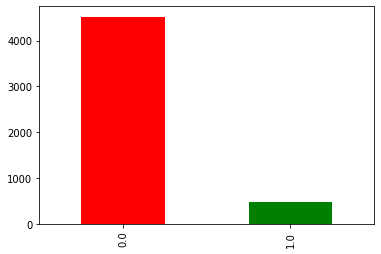

In [15]:
#Check the distribution of target variable.

BankRecords.LoanOnCard.value_counts().plot(color = ['red', 'green'],kind='bar') 

In [16]:
# Getting value counts of target variable
BankRecords.LoanOnCard.value_counts()

0.0    4520
1.0     480
Name: LoanOnCard, dtype: int64

**A bar plot and value counts above revealed that the target variable is highly unbalanced, with nearly most customers have not taken the Loan.**

**• Segregate predictors vs target attribute**

In [10]:
# Seperating features from target variable.

X = BankRecords.drop('LoanOnCard',axis = 1)
y = BankRecords['LoanOnCard']

In [18]:
X.shape

(5000, 7)

In [19]:
y.shape

(5000,)

• Check for target balancing and fix it if found imbalanced.

## **Balancing the Target Variable 'LoanOnCard' using SMOTE(Synthetic Minority Over-sampling Technique)**

Working with imbalanced datasets in most machine learning techniques will have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or **SMOTE** for short.



In [11]:
# import library for balancing the data using oversampling.

from imblearn.over_sampling import SMOTE

smote = SMOTE(ratio='minority')
X_sm, y_sm = smote.fit_sample(X, y) # Fit the data for sampling

In [12]:
X_sm.shape # shape of data after oversampling

(9040, 6)

In [22]:
y_sm  # shape of data after oversampling

array([0., 0., 0., ..., 1., 1., 1.])

In [23]:
#Check no of data points in each class of target variable.
unique, counts = np.unique(y_sm, return_counts=True)
print(unique,counts)

[0. 1.] [4520 4520]


Thus the data is balanced using oversampling technique and we can see 4520 samples in eact class of the target variable.

# **• Perform train-test split.**

In [13]:
# Splitting the data into training and testing set.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.3, random_state = 1)

In [14]:
X_train.shape

(6328, 6)

# **5. Model training, testing and tuning:**

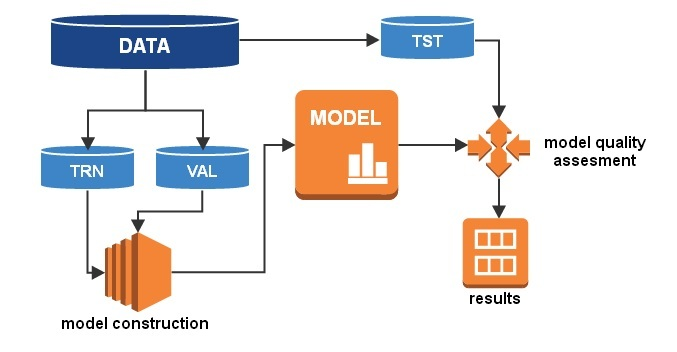

• Design and train a Logistic regression and Naive Bayes classifiers.

• Display the classification accuracies for train and test data.

• Display and explain the classification report in detail.

• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.

In [15]:
#Import Libraries

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

**Two different classification algorithms (Logistic Regression, and Gaussian NB) are run on the dataset and the best-performing one will be used to build the classification model.**

In [17]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('NB', GaussianNB()))

**Cross-validation is a statistical method used to estimate the skill of machine learning models**.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is also important that any preparation of the data prior to fitting the model occur on the CV-assigned training dataset within the loop rather than on the broader data set. This also applies to any tuning of hyperparameters. A failure to perform these operations within the loop may result in data leakage and an optimistic estimate of the model skill.

In [18]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10, random_state=1)    
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print('The Mean and Std. Deviation of the model on k-fold (10) cross validation :',msg)

The Mean and Std. Deviation of the model on k-fold (10) cross validation : LR: 0.883853 (0.011544)
The Mean and Std. Deviation of the model on k-fold (10) cross validation : NB: 0.873895 (0.015924)


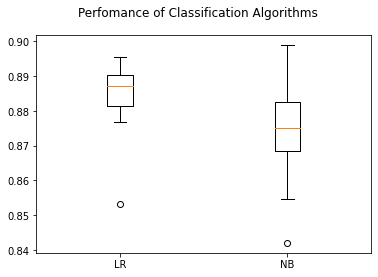

In [19]:
fig = plt.figure()
fig.suptitle('Perfomance of Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_c)
ax.set_xticklabels(names_c)
plt.show()

The results of a k-fold cross-validation run are often summarized with the mean and standard deviation of the model skill scores. 

Among Both the algorithms, **Linear Regression** achieved an accuracy of about 88 %, suggesting a high level of strength of this model to classify the customer response given all the defined customer features.


# **• Design and train a Logistic regression and Naive Bayes classifiers.**

## **Train and test the model using Logistic Regression algorithm.**

In [20]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train,y_train)

y_predict = model.predict(X_test)

y_prediction_train = model.predict(X_train)

TestScore = model.score(X_test,y_test)

TrainScore = model.score(X_train,y_train)
print('The accuracy of Logistic Regression on Test data:',TestScore)
print('\n')
print('The accuracy of Logistic Regression on Train Data :',TrainScore)


The accuracy of Logistic Regression on Test data: 0.8915929203539823


The accuracy of Logistic Regression on Train Data : 0.8844816687737042


The Confusion Matrix :
 [[1194  156]
 [ 138 1224]]


Text(0.5, 41.09375, 'Actual label')

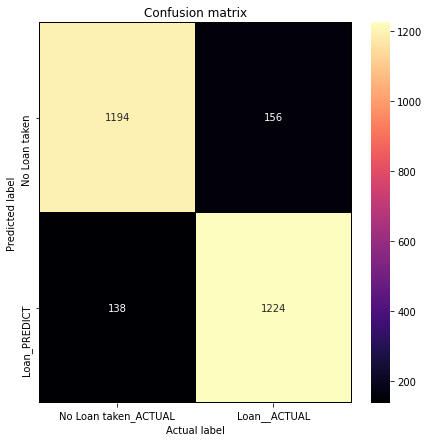

In [22]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.magma
plt.figure(figsize=(7,7))
sns.heatmap(cm, xticklabels=['No Loan taken_ACTUAL', 'Loan__ACTUAL'],yticklabels= ['No Loan taken', 'Loan_PREDICT'], cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

In the general case of a binary classification, we use the following terms for the 4 boxes:

**True Positive (TP) :** The model predicted 1224 as loan holders and who are actually loan holders.

**True Negative (TN):** The model predicted 1194 as No loan holders and who are actually No loan holders.

**False Positive (FP):** The model predicted 156 as No loan holders and who are actually loan holders. (TYPE I error)

**False Negative (FN):** The model predicted 138 as loan holders and who are actually No loan holders. ((TYPE II error)

In [24]:
# Classification Report on training data
from sklearn.metrics import classification_report

print('The Classification report of training data : \n', classification_report(y_train, y_prediction_train))

The Classification report of training data : 
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      3170
         1.0       0.88      0.89      0.88      3158

    accuracy                           0.88      6328
   macro avg       0.88      0.88      0.88      6328
weighted avg       0.88      0.88      0.88      6328



In [25]:
# Classification Report on testing data

print('The Classification report of testing data : \n', classification_report(y_test, y_predict))

The Classification report of testing data : 
               precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      1350
         1.0       0.89      0.90      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



## **Standardize features by removing the mean and scaling to unit variance.** 

Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data

In [26]:
# Apply scaler() to all the columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)


**Train a Naive Bayes model using the train data after scaling, print the accuracy on the test data**

In [27]:
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

nb_predict = nb.predict(X_test_scaled)

print('The accuracy of Naive Bayes :', nb.score(X_test_scaled,y_test))

The accuracy of Naive Bayes : 0.8761061946902655


**Train a logistic regression model using the train data scaled data, print the accuracy on the test data**

In [30]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
model.fit(X_train_scaled,y_train)

y_predict = model.predict(X_test_scaled)
y_prediction_train = model.predict(X_train_scaled)

TestScore = model.score(X_test_scaled,y_test)
TrainScore = model.score(X_train_scaled,y_train)
print('The accuracy of Logistic Regression on Test data:',TestScore)
print('\n')
print('The accuracy of Logistic Regression on Train Data :',TrainScore)

The accuracy of Logistic Regression on Test data: 0.8915929203539823


The accuracy of Logistic Regression on Train Data : 0.8844816687737042


**computing confusion matrix to understand the accuracy of model prediction**

The Confusion Matrix :
 [[1196  154]
 [ 140 1222]]


Text(0.5, 75.11374999999997, 'Actual label')

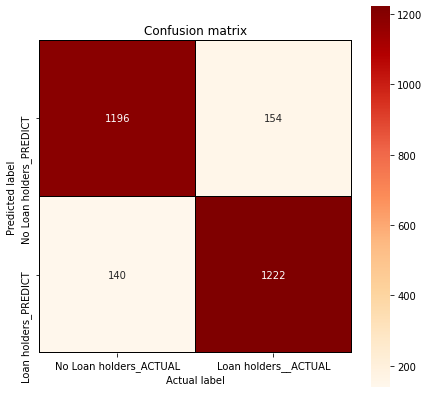

In [31]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict,labels=[0, 1])
print('The Confusion Matrix :\n',cm)

df_cm = pd.DataFrame(cm, index = [i for i in ["Non-Loan holders","Loan holders"]],
                  columns = [i for i in ["Non-Loan holders","Loan holders"]])
colormap = plt.cm.OrRd
plt.figure(figsize=(7,7))
sns.heatmap(df_cm, xticklabels=['No Loan holders_ACTUAL', 'Loan holders__ACTUAL'],yticklabels= ['No Loan holders_PREDICT', 'Loan holders_PREDICT'],square=True, cmap=colormap, linecolor='black', linewidths =0.5,annot=True,fmt='g')

plt.title('Confusion matrix')
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

The Red cells on the diagonal represent the correct classifications, the white cells represent the incorrect classifications. As we can see, this gives a much more detailed overview of how our model is performing.

In the general case of a binary classification, we use the following terms for the 4 boxes:

**True Positive (TP) :** The model predicted 1222 as loan holders and who are actually loan holders.

**True Negative (TN):** The model predicted 1196 as No loan holders and who are actually No loan holders.

**False Positive (FP):** The model predicted 154 as No loan holders and who are actually loan holders. (TYPE I error)

**False Negative (FN):** The model predicted 140 as loan holders and who are actually No loan holders. ((TYPE II error)

*   **Display the classification accuracies for train and test data.**  

In [32]:
# Classification Report of train data
from sklearn.metrics import classification_report

print("The Classification report of training data: \n " ,classification_report(y_train,y_prediction_train))

The Classification report of training data: 
                precision    recall  f1-score   support

         0.0       0.89      0.88      0.88      3170
         1.0       0.88      0.89      0.88      3158

    accuracy                           0.88      6328
   macro avg       0.88      0.88      0.88      6328
weighted avg       0.88      0.88      0.88      6328



In [33]:
# Classification Report of test data
from sklearn.metrics import classification_report

print("The Classification report of testing data: \n " ,classification_report(y_test, y_predict))

The Classification report of testing data: 
                precision    recall  f1-score   support

         0.0       0.90      0.89      0.89      1350
         1.0       0.89      0.90      0.89      1362

    accuracy                           0.89      2712
   macro avg       0.89      0.89      0.89      2712
weighted avg       0.89      0.89      0.89      2712



From the classification report we can see that the model has good precision and recall value and good macro and wieghted avg.

## **• Apply all the possible tuning techniques to train the best model for the given data. Select the final best trained model with your comments for selecting this model.**

Implement tuning on dataset by checking Variance Inflation Factor (VIF) to further tune the model accuracies and dropping features that are not important. 

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()

X =pd.DataFrame (X_train_scaled,columns=X.columns)
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,HighestSpend,1.22
5,FixedDepositAccount,1.12
2,MonthlyAverageSpend,1.10
1,HiddenScore,1.01
3,Level,1.01
4,Mortgage,1.01


**As VIF is small for all the selected features we can train the model with all above features.**

### **Handling Data leakage by using SMOTE on only training data** 


*   Is a big problem in machine learning when developing predictive models.
*   Data leakage is when information from outside the training dataset is used to create the model
*   The goal of predictive modeling is to develop a model that makes accurate predictions on new data, unseen during training.
*   It’s hard because we cannot evaluate the model on something we don’t have.
*   Therefore, we must estimate the performance of the model on unseen data by training it on only some of the data we have and evaluating it on the rest of the data.
*   **If we do smote on entire data it may leak information to validation data as well. we need to test the model with unseen information. so we will do sampling only on training data.**


In [35]:
# Load the dataset without oversampling 
X = BankRecords.drop('LoanOnCard',axis = 1)
y = BankRecords['LoanOnCard']

In [ ]:
# Shape of dataset.
X.shape

(5000, 6)

In [ ]:
y.shape

(5000,)

### **Split the data as train and test**

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

### **Perform oversampling using SMOTE only on training dataset to avoid data leakage**

In [37]:
smote = SMOTE(ratio='minority')
X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [41]:
X_train_sm.shape

(6338, 6)

Now there are 6338 samples in training data.

# **Build a final Model using training and test data.**

In [50]:
model = LogisticRegression(solver='liblinear')
model.fit(X_train_sm,y_train_sm)

y_predict = model.predict(X_test)
y_prediction_train = model.predict(X_train_sm)

Train_score = model.score(X_train_sm,y_train_sm)
print('The training accuracy of Logistic Regression :',Train_score)
print('\n')
Test_score = model.score(X_test,y_test)
print('The testing accuracy of Logistic Regression :',Test_score)

The training accuracy of Logistic Regression : 0.8886083938150836


The testing accuracy of Logistic Regression : 0.888


### **The model is 88% accurate on both train and test data.**

### **The Final Confusion Matrix**

The Confusion Matrix :
 [[1204  147]
 [  21  128]]


Text(0.5, 75.11374999999997, 'Actual label')

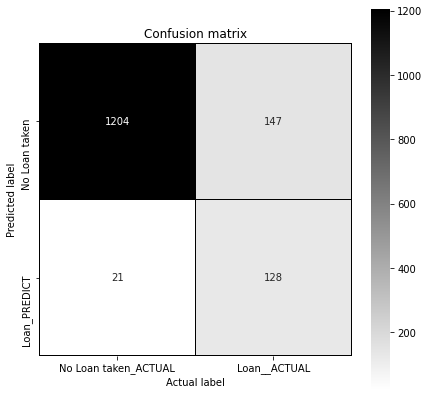

In [49]:
#computing Confusion Matrix
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,y_predict)
print('The Confusion Matrix :\n',cm)

colormap = plt.cm.binary
plt.figure(figsize=(7,7))
sns.heatmap(cm, xticklabels=['No Loan taken_ACTUAL', 'Loan__ACTUAL'],yticklabels= ['No Loan taken', 'Loan_PREDICT'],square=True, cmap=colormap, linecolor='black', linewidths =0.5,annot=True, fmt='g')

plt.title('Confusion matrix', y=1.1)
plt.ylabel('Predicted label')
plt.xlabel('Actual label')

The black and gray cells on the diagonal represent the correct classifications, the white and gray cells represent the incorrect classifications. As we can see, this gives a much more detailed overview of how our model is performing.

In the general case of a binary classification, we use the following terms for the 4 boxes:

**True Positive (TP)**: The model predicted 1204 as loan holders and who are actually loan holders.

**True Negative (TN)**: The model predicted 147 as No loan holders and who are actually No loan holders.

**False Positive (FP):** The model predicted 154 as No loan holders and who are actually loan holders. (TYPE I error)

**False Negative (FN)**: The model predicted 21 as loan holders and who are actually No loan holders. ((TYPE II error)

### **The Final Classification Report**

In [51]:
# Classification Report of train data

print("The Classification report of training data: \n " ,classification_report(y_train_sm,y_prediction_train))

The Classification report of training data: 
                precision    recall  f1-score   support

         0.0       0.90      0.88      0.89      3169
         1.0       0.88      0.90      0.89      3169

    accuracy                           0.89      6338
   macro avg       0.89      0.89      0.89      6338
weighted avg       0.89      0.89      0.89      6338



In [52]:
# Classification Report of test data

print("The Classification report of training data: \n " ,classification_report(y_test, y_predict))

The Classification report of training data: 
                precision    recall  f1-score   support

         0.0       0.98      0.89      0.93      1351
         1.0       0.47      0.86      0.60       149

    accuracy                           0.89      1500
   macro avg       0.72      0.88      0.77      1500
weighted avg       0.93      0.89      0.90      1500



We observe that the model performance is slightly poor than the previous model (oversampled train and test data) but model is free from data leakage and good predictor for Non Loan Holders.

# **6. Conclusion and improvisation:**
• Write your conclusion on the results.

• Detailed suggestions or improvements or on quality, quantity, variety, velocity, veracity etc. on the data points collected by the bank to perform a better data analysis in future.
©

# **Conclusion:**

## **Final Model uses : Logistic Regression**

## **Model Accuracy : 88 %** 

*   **Logistic regression** Algorithm is used to train and test the final model as it is performing well in training and testing data.

*  To manage the imbalance of Classes in target variable **Over Sampling** is done which improved the prediction of minority classes as well.

*   The model **has good recall value (88 % )**. The macro avg Recall and Precision are 88 % and 72 % respectively.


# **Improvisation:**

*   If the dataset contains **Equal samples** of both the classes better model can be build with higher accuracy, recall and precision values..

*  Few customers does't have credit card but those customer having loan on card. This **data error can be avoided**.

## **Suggestions for Expanding the Business:**

*   **The bank can target the Customers whose Monthly average Spend and Highest Spend is large as well as the customers having Fixed Deposit Accounts and Mortgage in the bank as their potential customers for Loan.** 

*  **The Hidden Score and Level features are masked but these are helpful in gaining more customers for Loan** .

*   **Thus the Bank can work on expanding the borrowers base rapidly to bring in more business via loan interests by tageting the potential customers mention in above analysis**.

#                    **--- END ---**
